# <span style="color:green">Application of Machine Learning Techniques in Predicting Properties of Stainless Steel</span>
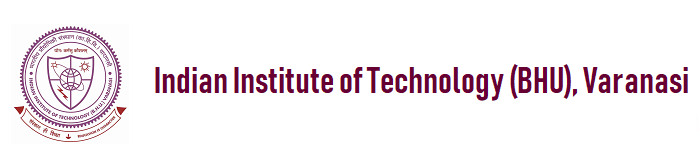
<h1><center><span style="color:red">F M Ayub Khan, M.Tech (Alloy Technology) </span> </center></h1> </span><h1><center><span 

# 1. Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
Data=pd.read_csv('../input/tensile/thesis1.csv')
pd.set_option('display.max_columns', None)


In [2]:
Data.head()

Condition Finish    End Date Work Center  \
0        CR     BA  04.04.2018     CRD_HB2   
1        CR     BA  04.04.2018     CRD_HB3   
2        CR     BA  04.04.2018     CRD_HB3   
3        CR     BA  07.04.2018     CRD_HB3   
4        CR     BA  08.04.2018     CRD_HB3   

                             Coil CutInst   O/P BATCH MATERIAL CODE Coil No.  \
0  JSSL MTA 0.88MM+/-0.02 - P & T FOR HBA  2000993856  CRC-J09-BA-W  J404660   
1  JSSL MTA 0.88MM+/-0.02 - P & T FOR HBA  2000993244  CRC-J09-BA-W   256771   
2  JSSL MTA 0.88MM+/-0.02 - P & T FOR HBA  2000993245  CRC-J09-BA-W  J405343   
3  JSSL MTA 1.45MM+/-0.04 - P & T FOR HBA  2000996149  CRC-J09-BA-W  J408272   
4  JSSL MTA 1.45MM+/-0.04 - P & T FOR HBA  2000996490  CRC-J09-BA-W   260876   

  Grade Thk (mm) ID/OD  Sample thk (mm)  YS (MPa)  UTS (MPa) El% on 50mm GL  \
0    JT     0.88    ID             0.93       411      710.0             16   
1    JT     0.88    ID             1.34       451      834.0             31   
2    JT     0.88    ID             0.88       417      852.0             21   
3    JT     1.45    ID             1.63       410      884.0             31   
4    JT     1.45    ID             1.67       437      903.0             31   

   Hardness (HRB) CRAP at     C%    Mn%     S%     P%   Si%   Ni%    Cr%  \
0             NaN    HBA2  0.112   9.95  0.006  0.057  0.30  0.45  14.36   
1             NaN    HBA3  0.112  10.08  0.006  0.060  0.32  0.42  14.46   
2             NaN    HBA3  0.112  10.01  0.007  0.057  0.34  0.47  14.14   
3             NaN    HBA3  0.128  10.00  0.005  0.064  0.41  0.47  14.02   
4             NaN    HBA3  0.108  10.04  0.007  0.073  0.34  0.46  14.26   

    Cu%   Mo%  N2 (ppm)      B% Al% Pb (ppm) Sn (pppm) Nb%    Co% H(ppm)  \
0  0.45  0.07      1550  0.0016   -       55        56   0      0    7.2   
1  0.50  0.09      1580  0.0019   -       79        98   0  0.041    4.5   
2  0.45  0.07      1550  0.0019   -       54        61   0      0    7.3   
3  0.47  0.09      1600   0.002   -       50        62   0      0    7.2   
4  0.51  0.06      1669  0.0016   -       79       130   0   0.05   5.66   

     MF              Quality Plan  Origin            Quality Plan.1  Cu+Ni  \
0  0.13         QA/TP 16 (AMD 17)  Jajpur         QA/TP-16 (AMD 17)   0.90   
1   0.4  QAD/MASTER QP/01 REV.-09   Hisar  QAD/MASTER QP/01 REV.-09   0.92   
2  0.21         QA/TP 16 (AMD 17)  Jajpur         QA/TP-16 (AMD 17)   0.92   
3  0.19         QA/TP 16 (AMD 17)  Jajpur         QA/TP-16 (AMD 17)   0.94   
4  0.38   QAD/MASTER QP/01 REV-10   Hisar   QAD/MASTER QP/01 REV-10   0.97   

  Classification  
0         TYPE-1  
1         TYPE-1  
2         TYPE-1  
3         TYPE-1  
4         TYPE-1

# 2.Exploratory Data Analysis

In [3]:
Data.describe()

O/P BATCH  Sample thk (mm)     YS (MPa)    UTS (MPa)  \
count  2.863000e+03      2863.000000  2863.000000  2859.000000   
mean   2.001574e+09         0.917076   427.785540   852.404337   
std    1.787813e+05         0.419950    30.558283    83.677504   
min    2.000993e+09         0.260000   344.000000   515.000000   
25%    2.001533e+09         0.610000   408.000000   804.000000   
50%    2.001621e+09         0.810000   423.000000   831.000000   
75%    2.001658e+09         1.190000   440.000000   880.000000   
max    2.001804e+09         3.170000   761.000000  1243.000000   

       Hardness (HRB)           C%          Mn%           S%           P%  \
count             1.0  2863.000000  2863.000000  2863.000000  2863.000000   
mean             98.0     0.104707     9.505414     0.005537     0.062244   
std               NaN     0.010147     0.786912     0.001736     0.008797   
min              98.0     0.084000     8.070000     0.001000     0.008000   
25%              98.0     0.095000     8.520000     0.005000     0.056000   
50%              98.0     0.106000     9.930000     0.006000     0.061000   
75%              98.0     0.112000    10.070000     0.007000     0.068000   
max              98.0     0.163000    10.450000     0.040000     0.095000   

               Si%          Ni%          Cr%          Cu%          Mo%  \
count  2863.000000  2863.000000  2863.000000  2863.000000  2863.000000   
mean      0.387827     0.890978    15.235187     1.466560     0.079141   
std       0.090456     0.466470     0.755400     0.651912     0.116964   
min       0.180000     0.400000    13.250000     0.410000     0.000000   
25%       0.320000     0.500000    14.440000     0.680000     0.040000   
50%       0.380000     0.680000    15.300000     1.940000     0.060000   
75%       0.440000     1.520000    16.070000     2.020000     0.100000   
max       0.690000     1.830000    16.550000     2.200000     3.000000   

          N2 (ppm)        Cu+Ni  
count  2863.000000  2863.000000  
mean   1646.344394     2.357538  
std     107.916205     1.031929  
min       0.000000     0.850000  
25%    1570.000000     1.160000  
50%    1630.000000     2.580000  
75%    1720.000000     3.560000  
max    1979.000000     3.920000

In [4]:
Data['Sample thk (mm)'].idxmax()

664

In [5]:

Data.describe()

O/P BATCH  Sample thk (mm)     YS (MPa)    UTS (MPa)  \
count  2.863000e+03      2863.000000  2863.000000  2859.000000   
mean   2.001574e+09         0.917076   427.785540   852.404337   
std    1.787813e+05         0.419950    30.558283    83.677504   
min    2.000993e+09         0.260000   344.000000   515.000000   
25%    2.001533e+09         0.610000   408.000000   804.000000   
50%    2.001621e+09         0.810000   423.000000   831.000000   
75%    2.001658e+09         1.190000   440.000000   880.000000   
max    2.001804e+09         3.170000   761.000000  1243.000000   

       Hardness (HRB)           C%          Mn%           S%           P%  \
count             1.0  2863.000000  2863.000000  2863.000000  2863.000000   
mean             98.0     0.104707     9.505414     0.005537     0.062244   
std               NaN     0.010147     0.786912     0.001736     0.008797   
min              98.0     0.084000     8.070000     0.001000     0.008000   
25%              98.0     0.095000     8.520000     0.005000     0.056000   
50%              98.0     0.106000     9.930000     0.006000     0.061000   
75%              98.0     0.112000    10.070000     0.007000     0.068000   
max              98.0     0.163000    10.450000     0.040000     0.095000   

               Si%          Ni%          Cr%          Cu%          Mo%  \
count  2863.000000  2863.000000  2863.000000  2863.000000  2863.000000   
mean      0.387827     0.890978    15.235187     1.466560     0.079141   
std       0.090456     0.466470     0.755400     0.651912     0.116964   
min       0.180000     0.400000    13.250000     0.410000     0.000000   
25%       0.320000     0.500000    14.440000     0.680000     0.040000   
50%       0.380000     0.680000    15.300000     1.940000     0.060000   
75%       0.440000     1.520000    16.070000     2.020000     0.100000   
max       0.690000     1.830000    16.550000     2.200000     3.000000   

          N2 (ppm)        Cu+Ni  
count  2863.000000  2863.000000  
mean   1646.344394     2.357538  
std     107.916205     1.031929  
min       0.000000     0.850000  
25%    1570.000000     1.160000  
50%    1630.000000     2.580000  
75%    1720.000000     3.560000  
max    1979.000000     3.920000

In [6]:
Data.corr()

O/P BATCH  Sample thk (mm)  YS (MPa)  UTS (MPa)  \
O/P BATCH         1.000000        -0.301517 -0.325670   0.028929   
Sample thk (mm)  -0.301517         1.000000  0.296378   0.270972   
YS (MPa)         -0.325670         0.296378  1.000000   0.548105   
UTS (MPa)         0.028929         0.270972  0.548105   1.000000   
Hardness (HRB)         NaN              NaN       NaN        NaN   
C%               -0.119629         0.319489  0.319288   0.372828   
Mn%              -0.071207         0.265795  0.308375   0.391576   
S%               -0.219832         0.316825  0.093072   0.100394   
P%                0.136529        -0.077088  0.127979   0.198748   
Si%               0.177616        -0.123301  0.197494   0.240324   
Ni%               0.156642        -0.343585 -0.338916  -0.407585   
Cr%               0.234354        -0.497041 -0.369411  -0.463429   
Cu%               0.334963        -0.582462 -0.389219  -0.454840   
Mo%              -0.006104        -0.034218 -0.022285  -0.023370   
N2 (ppm)         -0.070966        -0.164323 -0.107577  -0.242266   
Cu+Ni             0.282418        -0.523278 -0.399088  -0.471531   

                 Hardness (HRB)        C%       Mn%        S%        P%  \
O/P BATCH                   NaN -0.119629 -0.071207 -0.219832  0.136529   
Sample thk (mm)             NaN  0.319489  0.265795  0.316825 -0.077088   
YS (MPa)                    NaN  0.319288  0.308375  0.093072  0.127979   
UTS (MPa)                   NaN  0.372828  0.391576  0.100394  0.198748   
Hardness (HRB)              NaN       NaN       NaN       NaN       NaN   
C%                          NaN  1.000000  0.821907  0.054874  0.430283   
Mn%                         NaN  0.821907  1.000000  0.022181  0.535936   
S%                          NaN  0.054874  0.022181  1.000000 -0.082697   
P%                          NaN  0.430283  0.535936 -0.082697  1.000000   
Si%                         NaN  0.462077  0.566137 -0.191954  0.408398   
Ni%                         NaN -0.826701 -0.959648 -0.091833 -0.477249   
Cr%                         NaN -0.823704 -0.846953 -0.219680 -0.351353   
Cu%                         NaN -0.685615 -0.641559 -0.319462 -0.172425   
Mo%                         NaN -0.172598 -0.169663  0.005403 -0.087133   
N2 (ppm)                    NaN -0.575271 -0.697116 -0.002307 -0.410198   
Cu+Ni                       NaN -0.806830 -0.839095 -0.243329 -0.324662   

                      Si%       Ni%       Cr%       Cu%       Mo%  N2 (ppm)  \
O/P BATCH        0.177616  0.156642  0.234354  0.334963 -0.006104 -0.070966   
Sample thk (mm) -0.123301 -0.343585 -0.497041 -0.582462 -0.034218 -0.164323   
YS (MPa)         0.197494 -0.338916 -0.369411 -0.389219 -0.022285 -0.107577   
UTS (MPa)        0.240324 -0.407585 -0.463429 -0.454840 -0.023370 -0.242266   
Hardness (HRB)        NaN       NaN       NaN       NaN       NaN       NaN   
C%               0.462077 -0.826701 -0.823704 -0.685615 -0.172598 -0.575271   
Mn%              0.566137 -0.959648 -0.846953 -0.641559 -0.169663 -0.697116   
S%              -0.191954 -0.091833 -0.219680 -0.319462  0.005403 -0.002307   
P%               0.408398 -0.477249 -0.351353 -0.172425 -0.087133 -0.410198   
Si%              1.000000 -0.515166 -0.391272 -0.209959 -0.143626 -0.453191   
Ni%             -0.515166  1.000000  0.880318  0.694342  0.178268  0.661927   
Cr%             -0.391272  0.880318  1.000000  0.914895  0.123127  0.604955   
Cu%             -0.209959  0.694342  0.914895  1.000000  0.069511  0.439964   
Mo%             -0.143626  0.178268  0.123127  0.069511  1.000000  0.143163   
N2 (ppm)        -0.453191  0.661927  0.604955  0.439964  0.143163  1.000000   
Cu+Ni           -0.365513  0.890681  0.975913  0.945609  0.124497  0.577158   

                    Cu+Ni  
O/P BATCH        0.282418  
Sample thk (mm) -0.523278  
YS (MPa)        -0.399088  
UTS (MPa)       -0.471531  
Hardness (HRB)        NaN  
C%              -0.806830  
Mn%             -0.839095  
S%              

<AxesSubplot:>

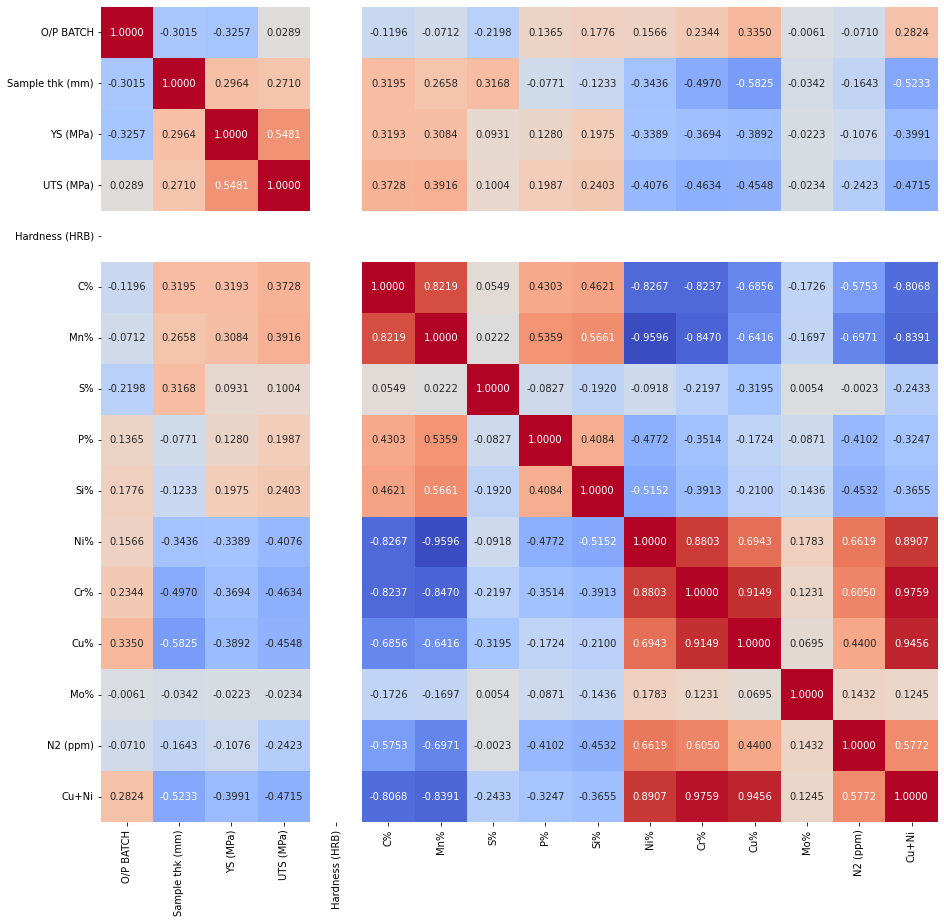

In [7]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(Data.corr(method='pearson'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)

#### Adding Grain Size to the dataset

In [8]:
conditions = [
    (Data['Grade'] == 'JT'),
    (Data['Grade'] == 'JSLU DD'),
    (Data['Grade']== 'JSLU SD'),(Data['Grade']== '204CU')
    ]

# create a list of the values we want to assign for each condition
values = ['33','25','20','25']

# create a new column and use np.select to assign values to it using our lists as arguments
Data['Grain Size'] = np.select(conditions, values)


In [9]:
# df=Data.loc[Data['Grade'] != '204CU']
df=Data

In [10]:
df1=df.loc[df['Grade'] == '204CU']
df2=df.loc[df['Grade'] == 'JSLU SD']
df3=df.loc[df['Grade'] == 'JSLU DD']
df4=df.loc[df['Grade'] == 'JT']

In [11]:
df.shape

(2863, 41)

In [12]:
df.groupby('Grade').size()

Grade
204CU      849
JSLU DD    818
JSLU SD    315
JT         881
dtype: int64

In [13]:
df.drop(['Condition','Finish', 'End Date','Work Center', 'Coil CutInst','O/P BATCH', 'MATERIAL CODE', 'Coil No.',
           'ID/OD','Hardness (HRB)', 'CRAP at','MF', 'Quality Plan', 'Origin','Quality Plan.1','Classification'],axis=1,inplace=True)

In [14]:
df.columns

Index(['Grade', 'Thk (mm)', 'Sample thk (mm)', 'YS (MPa)', 'UTS (MPa)',
       'El% on 50mm GL', 'C%', 'Mn%', 'S%', 'P%', 'Si%', 'Ni%', 'Cr%', 'Cu%',
       'Mo%', 'N2 (ppm)', 'B%', 'Al%', 'Pb (ppm)', 'Sn (pppm)', 'Nb%', 'Co%',
       'H(ppm)', 'Cu+Ni', 'Grain Size'],
      dtype='object')

In [15]:
df.isnull().sum()

Grade                 0
Thk (mm)             10
Sample thk (mm)       0
YS (MPa)              0
UTS (MPa)             4
El% on 50mm GL        1
C%                    0
Mn%                   0
S%                    0
P%                    0
Si%                   0
Ni%                   0
Cr%                   0
Cu%                   0
Mo%                   0
N2 (ppm)              0
B%                    6
Al%                1711
Pb (ppm)              0
Sn (pppm)             2
Nb%                1932
Co%                 693
H(ppm)              856
Cu+Ni                 0
Grain Size            0
dtype: int64

In [16]:
df.drop(['Thk (mm)','Al%','Nb%','Co%','H(ppm)'],axis=1,inplace=True) # As these variables have lots of missing values

In [17]:
df.isnull().sum()

Grade              0
Sample thk (mm)    0
YS (MPa)           0
UTS (MPa)          4
El% on 50mm GL     1
C%                 0
Mn%                0
S%                 0
P%                 0
Si%                0
Ni%                0
Cr%                0
Cu%                0
Mo%                0
N2 (ppm)           0
B%                 6
Pb (ppm)           0
Sn (pppm)          2
Cu+Ni              0
Grain Size         0
dtype: int64

In [18]:
df.dropna(inplace=True)

#### Checking for the strings

In [19]:
df['El% on 50mm GL_Number'] = df['El% on 50mm GL'].str.replace('([A-Za-z]+)', '')
df['El% on 50mm GL_Letter'] = df['El% on 50mm GL'].str.extract('([A-Za-z]+)')

In [20]:
to_drop=['El% on 50mm GL','El% on 50mm GL_Letter']
df.drop(to_drop,axis=1,inplace=True)


In [21]:
df.groupby('Grade').size()

Grade
204CU      846
JSLU DD    809
JSLU SD    315
JT         880
dtype: int64

In [22]:
df.replace(r'-', np.NaN, inplace=True)
df.replace(r'',np.NaN,inplace=True)
df.replace(r'*',np.NaN,inplace=True)
df.replace(r'&',np.NaN,inplace=True)
df.replace(r'^',np.NaN,inplace=True)
df.replace(r'%',np.NaN,inplace=True)
df.replace(r'$',np.NaN,inplace=True)
df.replace(r'#',np.NaN,inplace=True)
df.replace(r'@',np.NaN,inplace=True)
df.replace(r'!',np.NaN,inplace=True)
df.replace(r'<',np.NaN,inplace=True)
df.replace(r'>',np.NaN,inplace=True)
df.replace(r'?',np.NaN,inplace=True)

df.replace(r'\s+', np.nan, regex=True, inplace=True)
df.head()

Grade  Sample thk (mm)  YS (MPa)  UTS (MPa)     C%    Mn%     S%     P%  \
0    JT             0.93       411      710.0  0.112   9.95  0.006  0.057   
1    JT             1.34       451      834.0  0.112  10.08  0.006  0.060   
2    JT             0.88       417      852.0  0.112  10.01  0.007  0.057   
3    JT             1.63       410      884.0  0.128  10.00  0.005  0.064   
4    JT             1.67       437      903.0  0.108  10.04  0.007  0.073   

    Si%   Ni%    Cr%   Cu%   Mo%  N2 (ppm)      B% Pb (ppm) Sn (pppm)  Cu+Ni  \
0  0.30  0.45  14.36  0.45  0.07      1550  0.0016       55        56   0.90   
1  0.32  0.42  14.46  0.50  0.09      1580  0.0019       79        98   0.92   
2  0.34  0.47  14.14  0.45  0.07      1550  0.0019       54        61   0.92   
3  0.41  0.47  14.02  0.47  0.09      1600   0.002       50        62   0.94   
4  0.34  0.46  14.26  0.51  0.06      1669  0.0016       79       130   0.97   

  Grain Size El% on 50mm GL_Number  
0         33                    16  
1         33                    31  
2         33                    21  
3         33                    31  
4         33                    31

In [23]:
df.isnull().sum()

Grade                    1124
Sample thk (mm)             0
YS (MPa)                    0
UTS (MPa)                   0
C%                          0
Mn%                         0
S%                          0
P%                          0
Si%                         0
Ni%                         0
Cr%                         0
Cu%                         0
Mo%                         0
N2 (ppm)                    0
B%                          1
Pb (ppm)                    1
Sn (pppm)                   1
Cu+Ni                       0
Grain Size                  0
El% on 50mm GL_Number      40
dtype: int64

In [24]:
df.drop(['Grade'],axis=1,inplace=True)

In [25]:
df.shape

(2850, 19)

In [26]:
df.dropna(inplace=True)

In [27]:
df.shape

(2809, 19)

In [28]:
df['Sample thk (mm)'] = pd.to_numeric(df['Sample thk (mm)'], downcast="float")
df['C%'] = pd.to_numeric(df['C%'], downcast="float")
df['Mn%'] = pd.to_numeric(df['Mn%'], downcast="float")
df['S%'] = pd.to_numeric(df['S%'], downcast="float")
df['P%'] = pd.to_numeric(df['P%'], downcast="float")
df['Si%'] = pd.to_numeric(df['Si%'], downcast="float")
df['Ni%'] = pd.to_numeric(df['Ni%'], downcast="float")
df['Cr%'] = pd.to_numeric(df['Cr%'], downcast="float")
df['Cu%'] = pd.to_numeric(df['Cu%'], downcast="float")
df['Mo%'] = pd.to_numeric(df['Mo%'], downcast="float")
#df['N2 (ppm)'] = pd.to_numeric(df['N2 (ppm)'], downcast="float")
df['B%'] = pd.to_numeric(df['B%'], downcast="float")
#df['Al%'] = pd.to_numeric(df['Al%'], downcast="float")
df['Pb (ppm)'] = pd.to_numeric(df['Pb (ppm)'], downcast="float")
df['Sn (pppm)'] = pd.to_numeric(df['Sn (pppm)'], downcast="float")
#df['Nb%'] = pd.to_numeric(df['Nb%'], downcast="float")
#df['Co%'] = pd.to_numeric(df['Co%'], downcast="float")
#df['H(ppm)'] = pd.to_numeric(df['H(ppm)'], downcast="float")
df['Cu+Ni'] = pd.to_numeric(df['Cu+Ni'], downcast="float")

df['YS (MPa)'] = pd.to_numeric(df['YS (MPa)'], downcast="float")
df['UTS (MPa)'] = pd.to_numeric(df['UTS (MPa)'], downcast="float")

df['El% on 50mm GL_Number'] = pd.to_numeric(df['El% on 50mm GL_Number'], downcast="float")

In [29]:
df.rename({'El% on 50mm GL_Number':'El% on 50mm GL'},axis=1,inplace=True)

In [30]:
df['N %']=0.0001*df['N2 (ppm)']
# df['Pb %']=0.0001*df['Pb (ppm)']
# df['Sn %']=0.0001*df['Sn (pppm)']
# df['H %']=0.0001*df['H(ppm)']
# #df['Md30']= 551-462*df['C%']-9.2*df['Si%']-8.1*df['Mn%']-13.7*df['Cr%']-29*df['Ni%']-18.5*df['Mo%']-29*df['Cu%']-462*df['N2%']-11.36


In [31]:
df.head()

Sample thk (mm)  YS (MPa)  UTS (MPa)     C%    Mn%     S%     P%   Si%  \
0             0.93     411.0      710.0  0.112   9.95  0.006  0.057  0.30   
1             1.34     451.0      834.0  0.112  10.08  0.006  0.060  0.32   
2             0.88     417.0      852.0  0.112  10.01  0.007  0.057  0.34   
3             1.63     410.0      884.0  0.128  10.00  0.005  0.064  0.41   
4             1.67     437.0      903.0  0.108  10.04  0.007  0.073  0.34   

    Ni%    Cr%   Cu%   Mo%  N2 (ppm)      B%  Pb (ppm)  Sn (pppm)  Cu+Ni  \
0  0.45  14.36  0.45  0.07      1550  0.0016      55.0       56.0   0.90   
1  0.42  14.46  0.50  0.09      1580  0.0019      79.0       98.0   0.92   
2  0.47  14.14  0.45  0.07      1550  0.0019      54.0       61.0   0.92   
3  0.47  14.02  0.47  0.09      1600  0.0020      50.0       62.0   0.94   
4  0.46  14.26  0.51  0.06      1669  0.0016      79.0      130.0   0.97   

  Grain Size  El% on 50mm GL     N %  
0         33            16.0  0.1550  
1         33            31.0  0.1580  
2         33            21.0  0.1550  
3         33            31.0  0.1600  
4         33            31.0  0.1669

<AxesSubplot:>

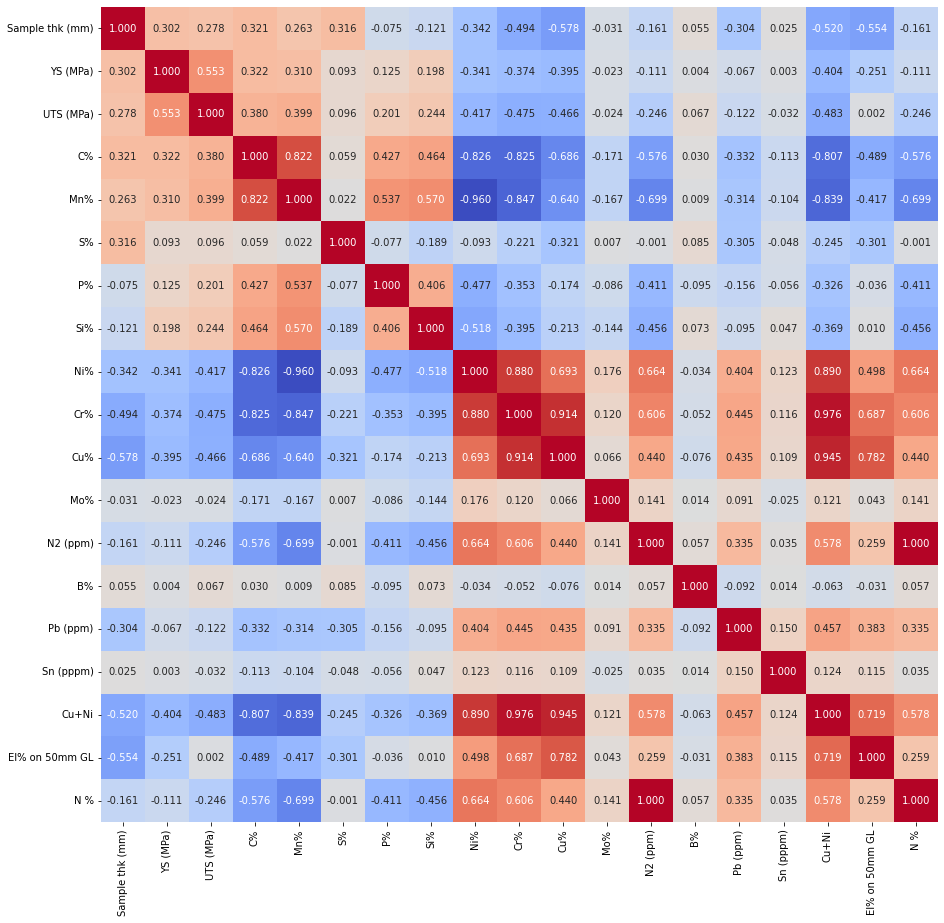

In [32]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.3f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)

##### Remove elongation less than 25% as it assumed that they were recorded wrongly

In [33]:
df = df.drop(df.index[df['El% on 50mm GL'] <= 25])

In [34]:
df.all(axis=0, bool_only=None, skipna=True, level=None)

Sample thk (mm)     True
YS (MPa)            True
UTS (MPa)           True
C%                  True
Mn%                 True
S%                  True
P%                  True
Si%                 True
Ni%                 True
Cr%                 True
Cu%                 True
Mo%                False
N2 (ppm)           False
B%                  True
Pb (ppm)            True
Sn (pppm)           True
Cu+Ni               True
Grain Size          True
El% on 50mm GL      True
N %                False
dtype: bool

In [35]:
count = (df['N %'] == 0).sum()
print('Count of zeros in Column  N: ', count)

Count of zeros in Column  N:  1


In [36]:
df = df[df['N %'] != 0]


In [37]:
df.shape

(2630, 20)

In [38]:
df.shape

(2630, 20)

In [39]:
df.head()

Sample thk (mm)  YS (MPa)  UTS (MPa)     C%    Mn%     S%     P%   Si%  \
1             1.34     451.0      834.0  0.112  10.08  0.006  0.060  0.32   
3             1.63     410.0      884.0  0.128  10.00  0.005  0.064  0.41   
4             1.67     437.0      903.0  0.108  10.04  0.007  0.073  0.34   
6             1.19     431.0      847.0  0.116  10.20  0.008  0.053  0.45   
7             1.31     434.0      825.0  0.115  10.08  0.008  0.068  0.31   

    Ni%    Cr%   Cu%   Mo%  N2 (ppm)      B%  Pb (ppm)  Sn (pppm)  Cu+Ni  \
1  0.42  14.46  0.50  0.09      1580  0.0019      79.0       98.0   0.92   
3  0.47  14.02  0.47  0.09      1600  0.0020      50.0       62.0   0.94   
4  0.46  14.26  0.51  0.06      1669  0.0016      79.0      130.0   0.97   
6  0.45  14.24  0.47  0.07      1550  0.0015      57.0       45.0   0.92   
7  0.52  14.43  0.46  0.08      1550  0.0011      57.0       67.0   0.98   

  Grain Size  El% on 50mm GL     N %  
1         33            31.0  0.1580  
3         33            31.0  0.1600  
4         33            31.0  0.1669  
6         33            29.0  0.1550  
7         33            27.0  0.1550

In [40]:
df['Grain Size'] = pd.to_numeric(df['Grain Size'], downcast="float")

In [41]:
df.columns

Index(['Sample thk (mm)', 'YS (MPa)', 'UTS (MPa)', 'C%', 'Mn%', 'S%', 'P%',
       'Si%', 'Ni%', 'Cr%', 'Cu%', 'Mo%', 'N2 (ppm)', 'B%', 'Pb (ppm)',
       'Sn (pppm)', 'Cu+Ni', 'Grain Size', 'El% on 50mm GL', 'N %'],
      dtype='object')

### Adding Noharo Equation for Md30 for analysis

In [42]:
# Noharo Equation Md =551- 462·(C + N) -9.2·Si -8.1·Mn -13.7· Cr -9.5·(Ni +Cu)-18.5·Mo - 68·Nb -1.42·(ASTM8)
# Andrew Equation MS(°C) = 539 – 423C – 30.4Mn – 17.7Ni – 12.1Cr – 7.5Mo
df['Md30']=551- 462*(df['C%']+df['N %']) -9.2*df['Si%']-8.1*df['Mn%']-13.7*df['Cr%']-9.5*(df['Ni%'] +df['Cu%'])-18.5*df['Mo%']-1.42*df['Grain Size']
df['MS']=539-423*df['C%']-30.4*df['Mn%']-17.7*df['Ni%']-12.1*df['Cr%']-7.5*df['Mo%']
df.head()

Sample thk (mm)  YS (MPa)  UTS (MPa)     C%    Mn%     S%     P%   Si%  \
1             1.34     451.0      834.0  0.112  10.08  0.006  0.060  0.32   
3             1.63     410.0      884.0  0.128  10.00  0.005  0.064  0.41   
4             1.67     437.0      903.0  0.108  10.04  0.007  0.073  0.34   
6             1.19     431.0      847.0  0.116  10.20  0.008  0.053  0.45   
7             1.31     434.0      825.0  0.115  10.08  0.008  0.068  0.31   

    Ni%    Cr%   Cu%   Mo%  N2 (ppm)      B%  Pb (ppm)  Sn (pppm)  Cu+Ni  \
1  0.42  14.46  0.50  0.09      1580  0.0019      79.0       98.0   0.92   
3  0.47  14.02  0.47  0.09      1600  0.0020      50.0       62.0   0.94   
4  0.46  14.26  0.51  0.06      1669  0.0016      79.0      130.0   0.97   
6  0.45  14.24  0.47  0.07      1550  0.0015      57.0       45.0   0.92   
7  0.52  14.43  0.46  0.08      1550  0.0011      57.0       67.0   0.98   

   Grain Size  El% on 50mm GL     N %       Md30        MS  
1        33.0            31.0  0.1580  86.300994  2.116977  
3        33.0            31.0  0.1600  83.642995  2.219974  
4        33.0            31.0  0.1669  86.997197  6.962003  
6        33.0            29.0  0.1550  87.055005 -0.941977  
7        33.0            27.0  0.1550  86.419005 -0.484003

# Checking Correlation of inputs with the outputs

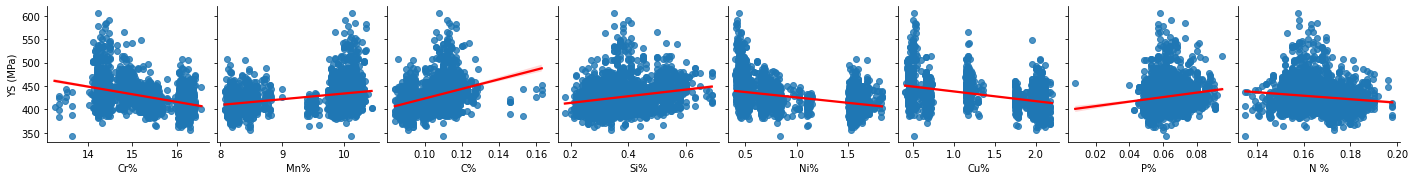

In [43]:
sns.pairplot(data=df,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Cr%', 'Mn%','C%',
       'Si%', 'Ni%',  'Cu%',  'P%','N %'],    
             y_vars=['YS (MPa)']
                  )



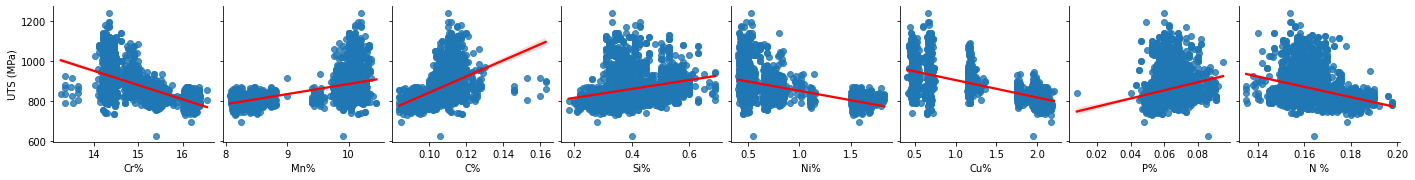

In [44]:

sns.pairplot(data=df,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Cr%', 'Mn%','C%',
       'Si%', 'Ni%',  'Cu%',  'P%','N %'],    
             y_vars=['UTS (MPa)']
                  )


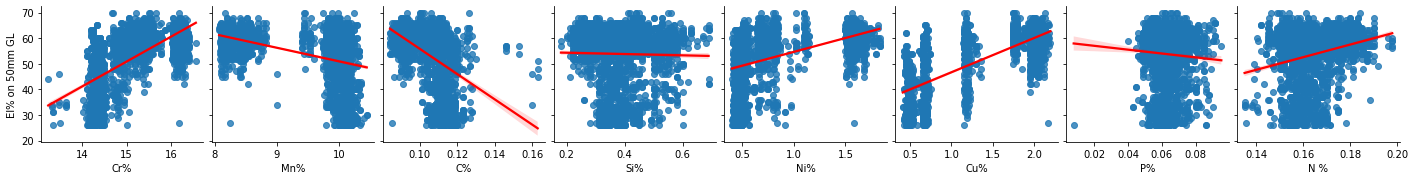

In [45]:

sns.pairplot(data=df,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Cr%', 'Mn%','C%',
       'Si%', 'Ni%',  'Cu%',  'P%','N %'],    
             y_vars=['El% on 50mm GL']
                  )

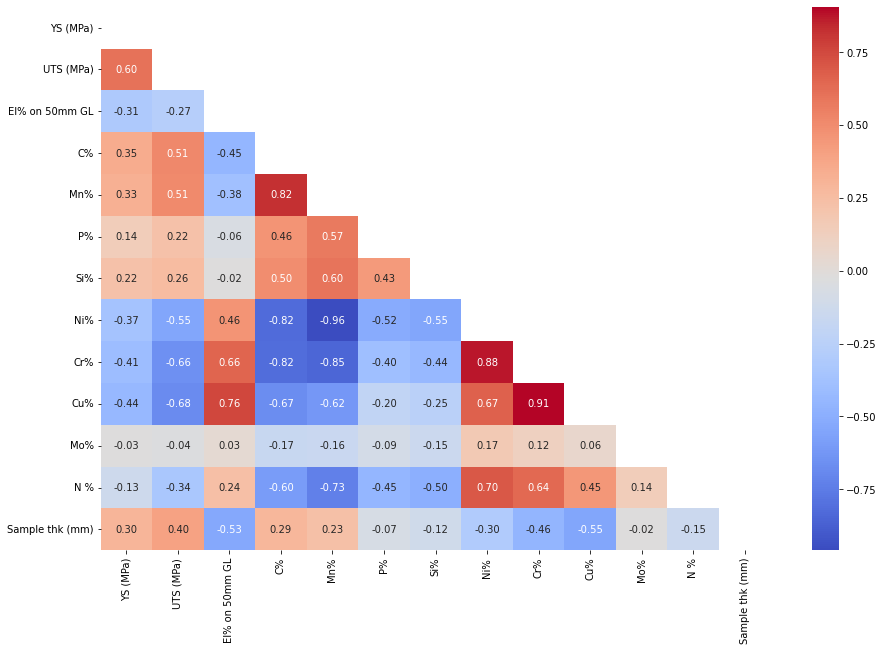

In [46]:
cor=df[['YS (MPa)', 'UTS (MPa)','El% on 50mm GL','C%', 'Mn%', 'P%', 'Si%',
       'Ni%', 'Cr%', 'Cu%', 'Mo%', 'N %','Sample thk (mm)']].corr()
mask = np.triu(np.ones_like(cor))
 
# plotting a triangle correlation heatmap
fig,ax=plt.subplots(figsize=(15,10))
ax = sns.heatmap(cor, cmap=plt.get_cmap('coolwarm'), annot=True, fmt='.2f',mask=mask)
 
# displaying heatmap
plt.show()

# Md30 and Ms temperature plot with Output features

In [47]:
df.columns

Index(['Sample thk (mm)', 'YS (MPa)', 'UTS (MPa)', 'C%', 'Mn%', 'S%', 'P%',
       'Si%', 'Ni%', 'Cr%', 'Cu%', 'Mo%', 'N2 (ppm)', 'B%', 'Pb (ppm)',
       'Sn (pppm)', 'Cu+Ni', 'Grain Size', 'El% on 50mm GL', 'N %', 'Md30',
       'MS'],
      dtype='object')

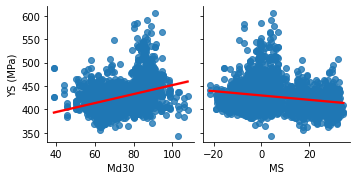

In [48]:
sns.pairplot(data=df,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Md30','MS'],    
             y_vars=['YS (MPa)'])


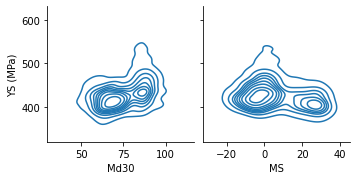

In [49]:
           
sns.pairplot(data=df,kind="kde", 
             x_vars=['Md30','MS'],    
             y_vars=['YS (MPa)']
            )

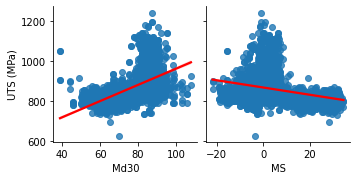

In [50]:
                  
sns.pairplot(data=df,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Md30','MS'],    
             y_vars=['UTS (MPa)']
                  )


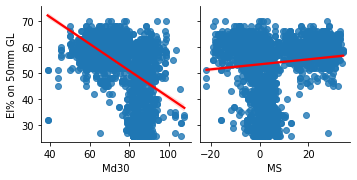

In [51]:
sns.pairplot(data=df,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Md30','MS'],    
             y_vars=['El% on 50mm GL']
                  )

<AxesSubplot:xlabel='Md30', ylabel='YS (MPa)'>

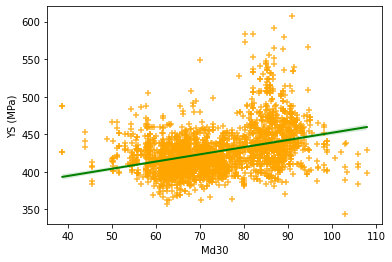

In [52]:
sns.regplot(df['Md30'], df["YS (MPa)"],scatter_kws={"color": "orange"},marker='+',line_kws={'linewidth':2,"color": "green"})



<AxesSubplot:xlabel='Md30', ylabel='UTS (MPa)'>

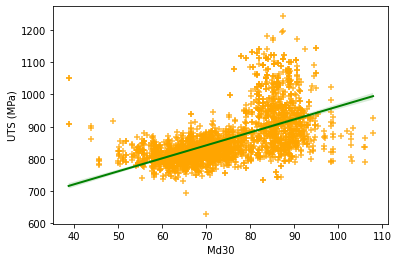

In [53]:
sns.regplot(df['Md30'], df["UTS (MPa)"],scatter_kws={"color": "orange"},marker='+',line_kws={'linewidth':2,"color": "green"})


<AxesSubplot:xlabel='Md30', ylabel='El% on 50mm GL'>

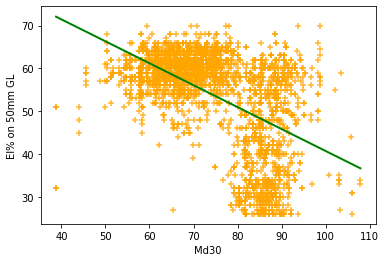

In [54]:

sns.regplot(df['Md30'], df["El% on 50mm GL"],scatter_kws={"color": "orange"},marker='+',line_kws={'linewidth':2,"color": "green"},ci=10)


In [55]:
df['Ni-eq']=df['Ni%']+0.31*df['Mn%']+22*df['C%']+17.5*df['N %']+df['Cu%']
df['Cr-eq']=df['Cr%']+1.65*df['Mo%']+1.5*df['Si%']


Text(0.5, 0, 'Chromium equivalent (Cr-eq)')

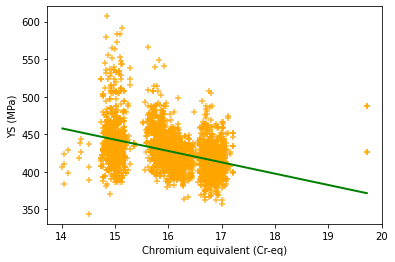

In [56]:
p=sns.regplot(df['Cr-eq'], df["YS (MPa)"],scatter_kws={"color": "orange"},marker='+',line_kws={'linewidth':2,"color": "green"},ci=10)
p.set_xlabel('Chromium equivalent (Cr-eq)')


Text(0.5, 0, 'Chromium equivalent (Cr-eq)')

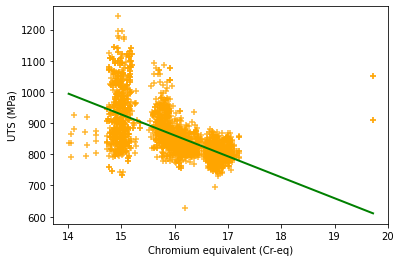

In [57]:
p=sns.regplot(df['Cr-eq'], df["UTS (MPa)"],scatter_kws={"color": "orange"},marker='+',line_kws={'linewidth':2,"color": "green"},ci=10)
p.set_xlabel('Chromium equivalent (Cr-eq)')


Text(0.5, 0, 'Chromium equivalent (Cr-eq)')

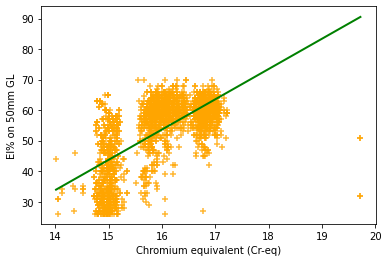

In [58]:
p=sns.regplot(df['Cr-eq'], df["El% on 50mm GL"],scatter_kws={"color": "orange"},marker='+',line_kws={'linewidth':2,"color": "green"},ci=10)
p.set_xlabel('Chromium equivalent (Cr-eq)')


Text(0.5, 0, 'Nickel equivalent (Cr-eq)')

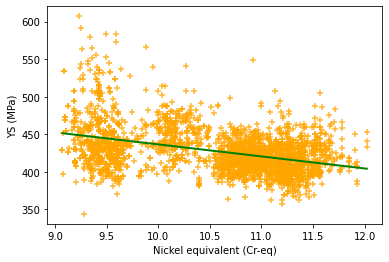

In [59]:
p=sns.regplot(df['Ni-eq'], df["YS (MPa)"],scatter_kws={"color": "orange"},marker='+',line_kws={'linewidth':2,"color": "green"},ci=10)
p.set_xlabel('Nickel equivalent (Cr-eq)')


Text(0.5, 0, 'Nickel equivalent (Cr-eq)')

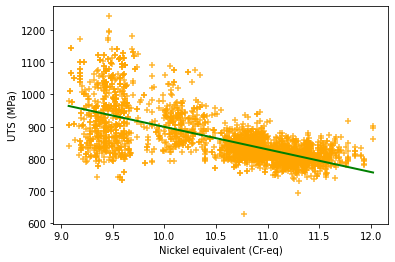

In [60]:
p=sns.regplot(df['Ni-eq'], df["UTS (MPa)"],scatter_kws={"color": "orange"},marker='+',line_kws={'linewidth':2,"color": "green"},ci=10)
p.set_xlabel('Nickel equivalent (Cr-eq)')


Text(0.5, 0, 'Nickel equivalent (Cr-eq)')

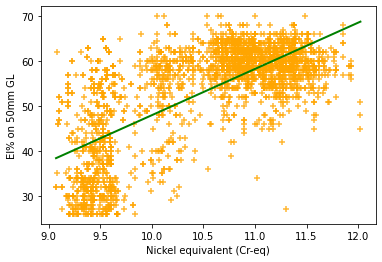

In [61]:
p=sns.regplot(df['Ni-eq'], df["El% on 50mm GL"],scatter_kws={"color": "orange"},marker='+',line_kws={'linewidth':2,"color": "green"},ci=10)
p.set_xlabel('Nickel equivalent (Cr-eq)')


In [62]:
df['Ni-eq/Cr-eq']=df['Ni-eq']/df['Cr-eq']

In [63]:
df_eq=df.loc[df['Ni-eq/Cr-eq']>0.55]


Text(0, 0.5, 'YS (MPa)')

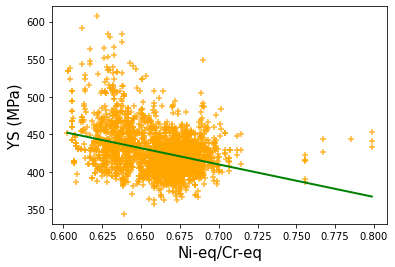

In [64]:
p=sns.regplot(df_eq['Ni-eq/Cr-eq'], df_eq["YS (MPa)"],scatter_kws={"color": "orange"},marker='+',line_kws={'linewidth':2,"color": "green"},ci=10)
p.set_xlabel('Ni-eq/Cr-eq',fontsize=15)
p.set_ylabel('YS (MPa)',fontsize=15)


Text(0, 0.5, 'UTS (MPa)')

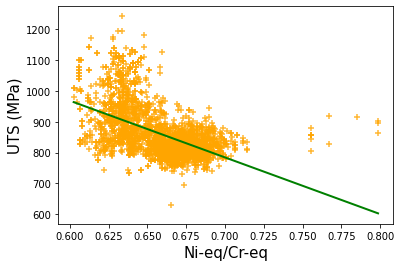

In [65]:
p=sns.regplot(df_eq['Ni-eq/Cr-eq'], df_eq["UTS (MPa)"],scatter_kws={"color": "orange"},marker='+',line_kws={'linewidth':2,"color": "green"},ci=10)
p.set_xlabel('Ni-eq/Cr-eq',fontsize=15)
p.set_ylabel('UTS (MPa)',fontsize=15)


Text(0, 0.5, 'El% on 50mm GL')

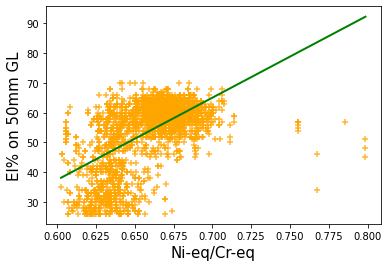

In [66]:
p=sns.regplot(df_eq['Ni-eq/Cr-eq'], df_eq["El% on 50mm GL"],scatter_kws={"color": "orange"},marker='+',line_kws={'linewidth':2,"color": "green"},ci=10)
p.set_xlabel('Ni-eq/Cr-eq',fontsize=15)
p.set_ylabel('El% on 50mm GL',fontsize=15)

# 204 Cu

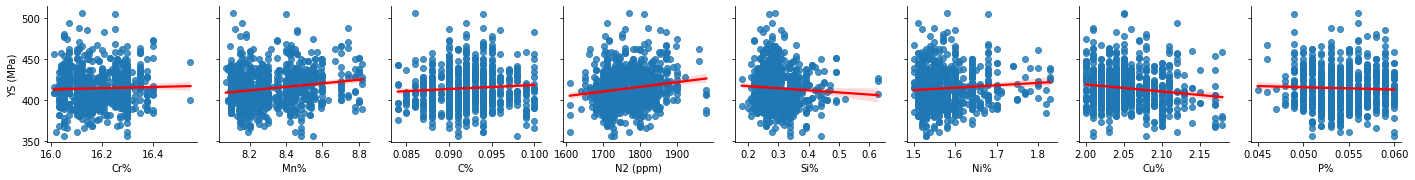

In [67]:
sns.pairplot(data=df1,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Cr%', 'Mn%','C%','N2 (ppm)',
       'Si%', 'Ni%',  'Cu%',  'P%'],    
             y_vars=['YS (MPa)']
                  )


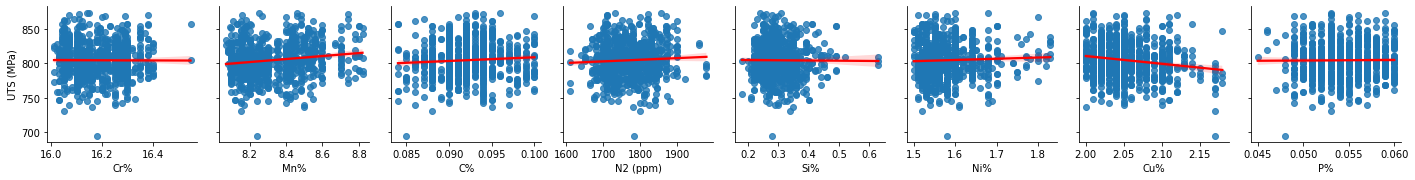

In [68]:
sns.pairplot(data=df1,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Cr%', 'Mn%','C%','N2 (ppm)',
       'Si%', 'Ni%',  'Cu%',  'P%'],    
             y_vars=['UTS (MPa)']
                  )


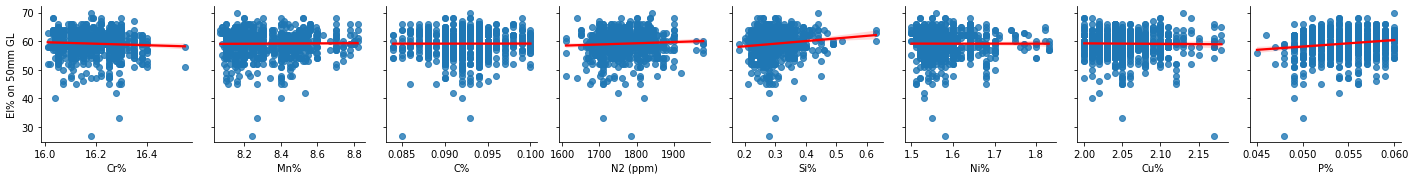

In [69]:
df1=pd.read_csv("../input/grades/204Cu.csv")
df1['El% on 50mm GL'] = pd.to_numeric(df1['El% on 50mm GL'], downcast="float")
sns.pairplot(data=df1,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Cr%', 'Mn%','C%','N2 (ppm)',
       'Si%', 'Ni%',  'Cu%',  'P%'],    
             y_vars=['El% on 50mm GL']
                  )

# JSLU DD

In [70]:
df2=pd.read_csv("../input/grades/JSLU DD.csv")


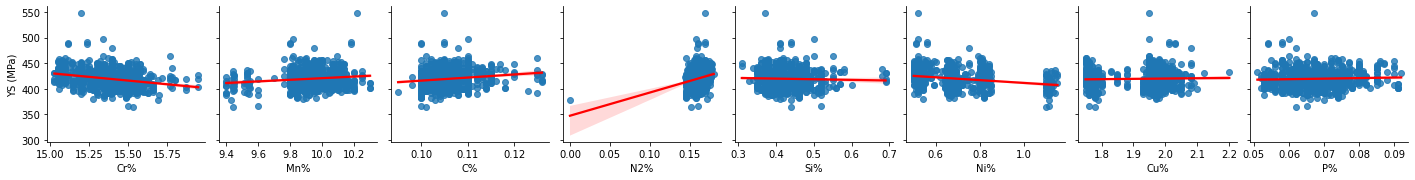

In [71]:
sns.pairplot(data=df2,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Cr%', 'Mn%','C%','N2%',
       'Si%', 'Ni%',  'Cu%',  'P%'],    
             y_vars=['YS (MPa)'])


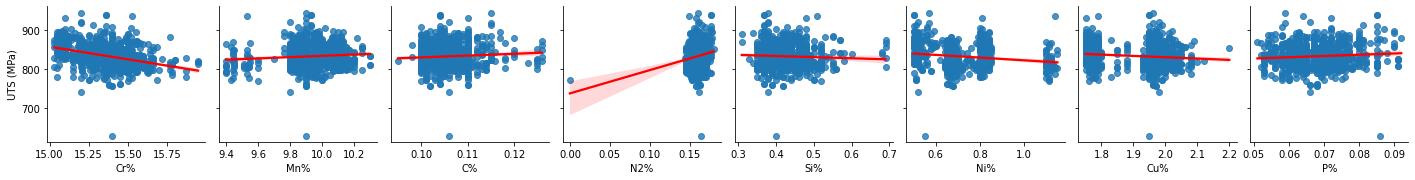

In [72]:
                  
sns.pairplot(data=df2,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Cr%', 'Mn%','C%','N2%',
       'Si%', 'Ni%',  'Cu%',  'P%'],    
             y_vars=['UTS (MPa)']
                  )


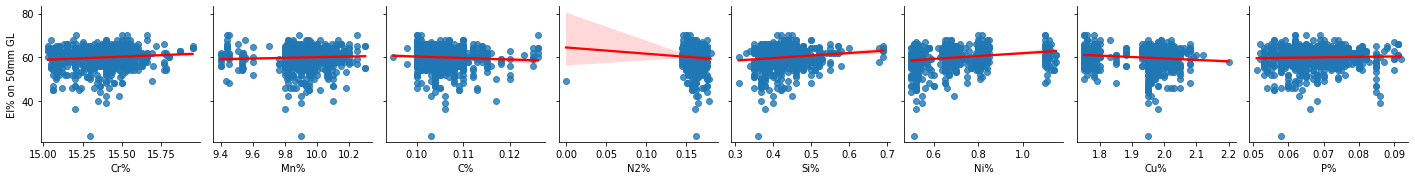

In [73]:
sns.pairplot(data=df2,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Cr%', 'Mn%','C%','N2%',
       'Si%', 'Ni%',  'Cu%',  'P%'],    
             y_vars=['El% on 50mm GL']
                  )


# JSLU SD

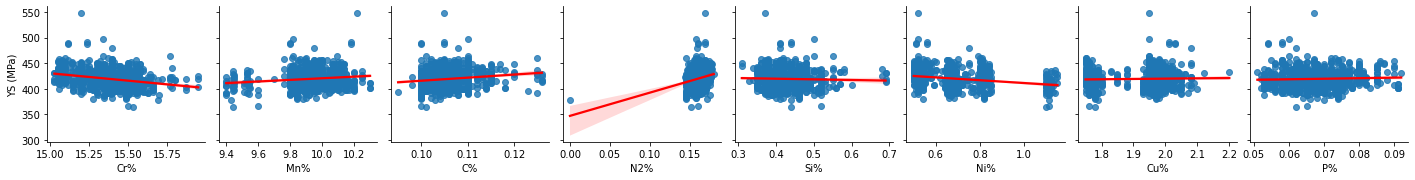

In [74]:
df3=pd.read_csv('../input/grades/JSLU DD.csv')
sns.pairplot(data=df3,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Cr%', 'Mn%','C%','N2%',
       'Si%', 'Ni%',  'Cu%',  'P%'],    
             y_vars=['YS (MPa)']
                  )


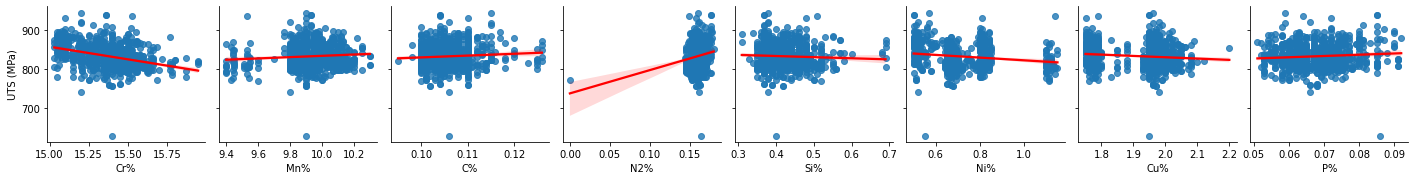

In [75]:
sns.pairplot(data=df3,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Cr%', 'Mn%','C%','N2%',
       'Si%', 'Ni%',  'Cu%',  'P%'],    
             y_vars=['UTS (MPa)']
                  )


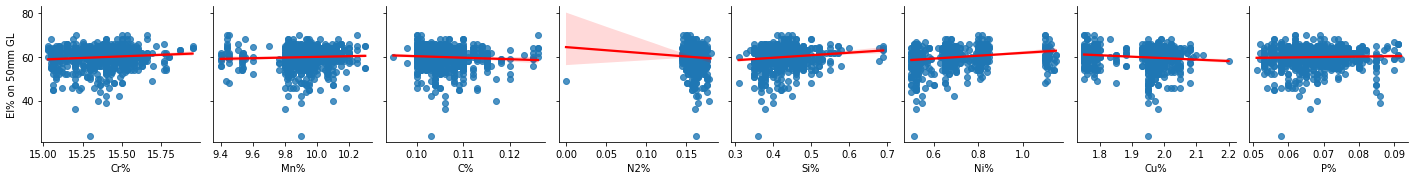

In [76]:
sns.pairplot(data=df3,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Cr%', 'Mn%','C%','N2%',
       'Si%', 'Ni%',  'Cu%',  'P%'],    
             y_vars=['El% on 50mm GL']
                  )


# JT Grade

In [77]:
df4=pd.read_csv("../input/grades/JT.csv")


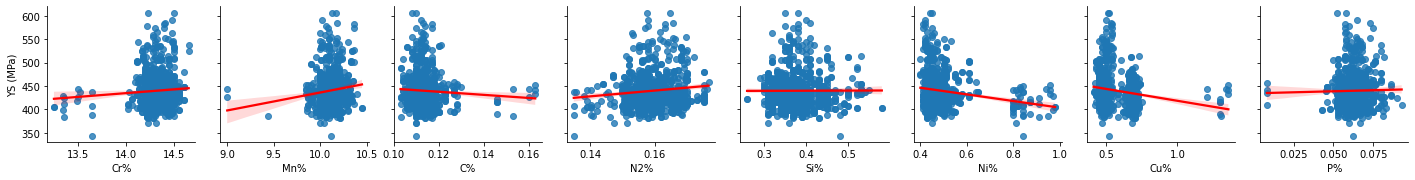

In [78]:
sns.pairplot(data=df4,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Cr%', 'Mn%','C%','N2%',
       'Si%', 'Ni%',  'Cu%',  'P%'],    
             y_vars=['YS (MPa)']
                  )


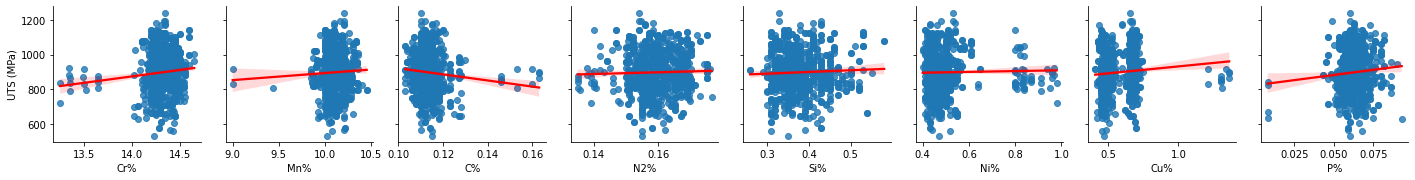

In [79]:
sns.pairplot(data=df4,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Cr%', 'Mn%','C%','N2%',
       'Si%', 'Ni%',  'Cu%',  'P%'],    
             y_vars=['UTS (MPa)'])


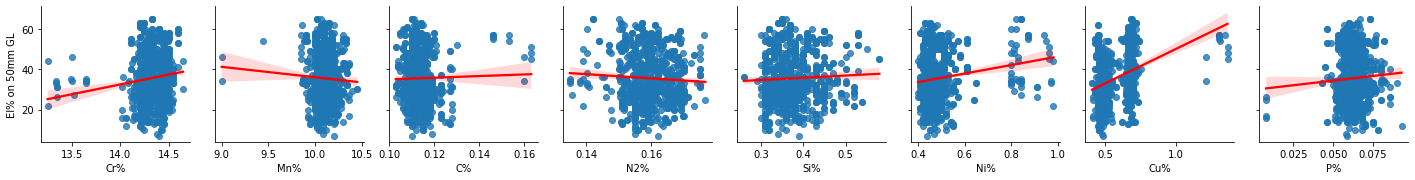

In [80]:
                  
sns.pairplot(data=df4,kind="reg", plot_kws={'line_kws':{'color':'red'}},
             x_vars=['Cr%', 'Mn%','C%','N2%',
       'Si%', 'Ni%',  'Cu%',  'P%'],    
             y_vars=['El% on 50mm GL']
                  )

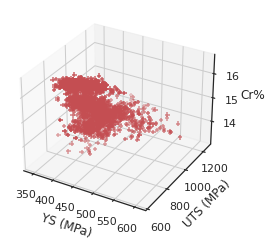

In [81]:
from mpl_toolkits.mplot3d import Axes3D


sns.set(style = "ticks")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['YS (MPa)']
y = df['UTS (MPa)']
z = df['Cr%']

ax.set_xlabel("YS (MPa)")
ax.set_ylabel("UTS (MPa)")
ax.set_zlabel("Cr%")

ax.scatter(x, y, z, c='r',marker='+')

plt.show()

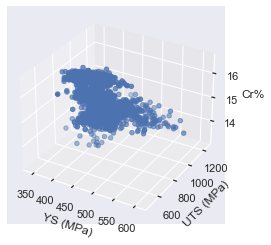

In [82]:
X=df[['Cr%','Sample thk (mm)','C%', 'Mn%', 'P%','Cu%',
       'Si%', 'Ni%','Mo%',  'Grain Size','N %','Md30']]
y=df[['YS (MPa)','UTS (MPa)','El% on 50mm GL']]
#,'El% on 50mm GL'

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

# <h1><center>Importing Different models for comparison</center></h1>

In [84]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error as mse


In [85]:
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(random_state=2),
    "K-nn": KNeighborsRegressor(),                          # Accept default parameters
    
    "RandomForestRegressor": RandomForestRegressor( random_state=2),
    "Decision Tree Regressor":DecisionTreeRegressor(random_state=2),
    
    
    "Xgbregressor":MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror',random_state=2))
    
}

In [86]:
y_test_predict = dict()
y_mse = dict()
score=dict()
score_train=dict()

for name, estimator in ESTIMATORS.items():     
    estimator.fit(X_train, y_train)                    # fit() with instantiated object
    y_test_predict[name] = estimator.predict(X_test)   # Make predictions and save it in dict under key: name
    
    score[name]=estimator.score(X_test,y_test)
    score_train[name]=estimator.score(X_train,y_train)

In [87]:
score

{'Extra trees': 0.6122514332479302,
 'K-nn': 0.47155791259413465,
 'RandomForestRegressor': 0.6463568243004013,
 'Decision Tree Regressor': 0.4353361468887962,
 'Xgbregressor': 0.5888118578411947}

In [88]:
score_train

{'Extra trees': 0.9834042573012094,
 'K-nn': 0.6956868404423129,
 'RandomForestRegressor': 0.9461672650916176,
 'Decision Tree Regressor': 0.9834042573012094,
 'Xgbregressor': 0.9530750518431917}

# Xgboost

In [89]:
from sklearn.metrics import r2_score
log=[]
for i in range(0,40,1):
    X=df[['Cr%','Sample thk (mm)', 'C%', 'Mn%',  'P%',
       'Si%', 'Ni%', 'Cu%','Mo%', 'N %','Md30']]
    y=df[['YS (MPa)','UTS (MPa)','El% on 50mm GL']]
#,'El% on 50mm GL'

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state = i)
    reg = MultiOutputRegressor(xgb.XGBRegressor())
    reg.fit(X_train,y_train)
    pred_TI = reg.predict(X_test)
    rr = r2_score(y_test, pred_TI)
    print(rr, i)
    log.append(rr)

0.59100539009075 0
0.7037826493053373 1
0.6893078509586655 2
0.6565398614831778 3
0.6458496181072673 4
0.6606868536364952 5
0.6441869638255651 6
0.6598386009683791 7
0.7009279144910492 8
0.6899260259028933 9
0.6159929589914177 10
0.6850610321208731 11
0.6386489520739522 12
0.7391430386492951 13
0.5993578432748355 14
0.6438709916472786 15
0.6461051677091408 16
0.6812275284443964 17
0.6370242800627303 18
0.6433411233545095 19
0.6217482190268789 20
0.7099951857942263 21
0.7254397343524115 22
0.6959152048429118 23
0.6675455013367967 24
0.6332876200120343 25
0.669832197986184 26
0.6985528142279591 27
0.633355767147056 28
0.7044227671496809 29
0.6388315470072484 30
0.6609905987991246 31
0.6289251854396145 32
0.6584426503078055 33
0.7083981138345927 34
0.6479212637375844 35
0.708488400795171 36
0.6904759050116965 37
0.6690819446409048 38
0.6431144640965302 39


In [90]:
from sklearn.metrics import r2_score
log=[]
for i in range(0,40,1):
    X=df[['Cr%','Sample thk (mm)', 'C%', 'Mn%',  'P%',
       'Si%', 'Ni%', 'Cu%','Mo%', 'N %','Md30']]
    y=df[['YS (MPa)','UTS (MPa)','El% on 50mm GL']]
#,'El% on 50mm GL'

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state = i)
    reg = MultiOutputRegressor(xgb.XGBRegressor())
    reg.fit(X_train,y_train)
    pred_TI = reg.predict(X_test)
    rr = r2_score(y_test, pred_TI)
    print(rr, i)
    log.append(rr)

0.59100539009075 0
0.7037826493053373 1
0.6893078509586655 2
0.6565398614831778 3
0.6458496181072673 4
0.6606868536364952 5
0.6441869638255651 6
0.6598386009683791 7
0.7009279144910492 8
0.6899260259028933 9
0.6159929589914177 10
0.6850610321208731 11
0.6386489520739522 12
0.7391430386492951 13
0.5993578432748355 14
0.6438709916472786 15
0.6461051677091408 16
0.6812275284443964 17
0.6370242800627303 18
0.6433411233545095 19
0.6217482190268789 20
0.7099951857942263 21
0.7254397343524115 22
0.6959152048429118 23
0.6675455013367967 24
0.6332876200120343 25
0.669832197986184 26
0.6985528142279591 27
0.633355767147056 28
0.7044227671496809 29
0.6388315470072484 30
0.6609905987991246 31
0.6289251854396145 32
0.6584426503078055 33
0.7083981138345927 34
0.6479212637375844 35
0.708488400795171 36
0.6904759050116965 37
0.6690819446409048 38
0.6431144640965302 39


#### Adding Sample thickness in the model thickness 

In [91]:
from sklearn.metrics import r2_score
log=[]
for i in range(0,40,1):
    X=df[['Cr%','Sample thk (mm)', 'C%', 'Mn%',  'P%',
       'Si%', 'Ni%', 'Cu%','Mo%', 'N %']]
    y=df[['YS (MPa)','UTS (MPa)','El% on 50mm GL']]
#,'El% on 50mm GL'

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state = i)
    reg = RandomForestRegressor()
    reg.fit(X_train,y_train)
    pred_TI = reg.predict(X_test)
    rr = r2_score(y_test, pred_TI)
    print(rr, i)
    log.append(rr)

0.6361054574355545 0
0.7385880297184085 1
0.6949162514654454 2
0.6860305207314289 3
0.662624647315555 4
0.6752404022385564 5
0.6729577330626709 6
0.6690698206231707 7
0.7149764737642861 8
0.7070230971707137 9
0.6402367610962237 10
0.69397600327621 11
0.66960894799245 12
0.7521583909089418 13
0.6378306357510727 14
0.6538287309608597 15
0.6669366961250273 16
0.6817641238955714 17
0.6706657031000521 18
0.6812287646970274 19
0.6279065085652586 20
0.7181238374716603 21
0.7193112026800496 22
0.6865555563899618 23
0.6459609172624329 24
0.6773881410923531 25
0.677347533495976 26
0.7142105146454883 27
0.6710796269068937 28
0.7183040524771446 29
0.6645241601736983 30
0.6877759899636878 31
0.6461639630051906 32
0.6691820742349149 33
0.7114318677575668 34
0.6638065150867117 35
0.7152323177411409 36
0.7108271980930781 37
0.6973069045355299 38
0.6607288042598288 39


In [92]:
sum(log)/len(log)

0.6822233719291948

In [93]:
X=df[['Cr%','Sample thk (mm)', 'C%', 'Mn%',  'P%',
       'Si%', 'Ni%', 'Cu%','Mo%','N %']]
y=df[['YS (MPa)','UTS (MPa)','El% on 50mm GL']]
#,'El% on 50mm GL'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state = 13)


In [94]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [95]:
rf.score(X_test,y_test)

0.7513804318998302

In [96]:
rf

RandomForestRegressor()

In [97]:
rf.score(X_train,y_train)

0.9443217586516832

In [98]:
y_pred_rf=rf.predict(X_test)

In [99]:
r2_score(y_test,y_pred_rf)

0.7513804318998302

In [100]:
p1=sum(log)/len(log)
p1

0.6822233719291948

In [101]:
r2_score(y_test,y_pred_rf)

0.7513804318998302

In [102]:
y_pred_tr_rf=rf.predict(X_train)

In [103]:
mean_squared_error(y_test.iloc[:,0],y_pred_rf[:,0],squared=False)

16.502133384412257

In [104]:
from scipy.stats import linregress
linregress(y_test.iloc[:,0],y_pred_rf[:,0])

LinregressResult(slope=0.7057668324663517, intercept=125.16004041478993, rvalue=0.8386484008498399, pvalue=7.950989922307936e-71, stderr=0.028372463707456077, intercept_stderr=12.175023178345143)

In [105]:
sum(y_pred_rf[:,0])/len(y_pred_rf[:,0])

427.260444460588

# Random Forest Plots

Text(0.5, 1.0, 'Testing Data: RF')

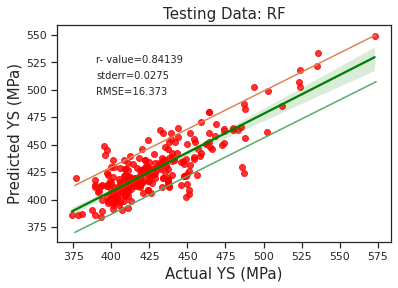

In [106]:
x1=[376,574]
y1=[]
y2=[]
for x in x1:
    y_1=0.692986*x+152.225
    y_2=0.692986*x+109.477
    y1.append(y_1)
    y2.append(y_2)
fig,ax=plt.subplots()
YS=sns.regplot(y_test.iloc[:,0],y_pred_rf[:,0],scatter_kws={"color": "red"}, line_kws={"color": "Green"},ax=ax)
YS.set_xlabel("Actual YS (MPa)", fontsize = 15)
YS.set_ylabel("Predicted YS (MPa)", fontsize = 15)
ax.text(390,525, "r- value=0.84139", fontsize=10)
ax.text(390,510, "stderr=0.0275", fontsize=10)
ax.text(390,495, "RMSE=16.373", fontsize=10)
sns.lineplot(x1,y1,ax=ax,palette='g')
sns.lineplot(x1,y2,ax=ax,palette='g')
plt.title('Testing Data: RF',fontsize=15)

Text(0.5, 1.0, 'Training Data: RF')

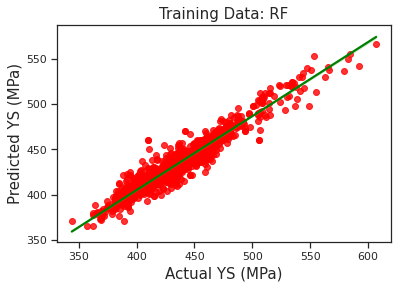

In [107]:
fig,ax=plt.subplots()
YS=sns.regplot(y_train.iloc[:,0],y_pred_tr_rf[:,0],scatter_kws={"color": "red"}, line_kws={"color": "Green"})
YS.set_xlabel("Actual YS (MPa)", fontsize = 15)
YS.set_ylabel("Predicted YS (MPa)", fontsize = 15)

plt.title('Training Data: RF',fontsize=15)

In [108]:
linregress(y_test.iloc[:,1],y_pred_rf[:,1])

LinregressResult(slope=0.7315419518347172, intercept=228.4245676013884, rvalue=0.8775289483977241, pvalue=2.759765880243146e-85, stderr=0.024743867153018424, intercept_stderr=21.40905949240249)

In [109]:
sum(y_pred_rf[:,1])/len(y_pred_rf[:,1])

858.5102591937004

In [110]:
mean_squared_error(y_test.iloc[:,1],y_pred_rf[:,1],squared=False)

39.6887779350593

Text(0.5, 1.0, 'Testing Data: RF')

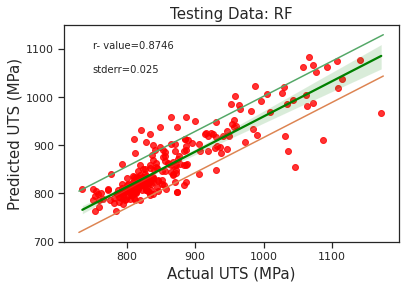

In [111]:
x1=[730,1175]
y1=[]
y2=[]
for x in x1:
    y_1=0.729949*x+186.263
    y_2=0.729949*x+272.05
    y1.append(y_1)
    y2.append(y_2)
fig,ax=plt.subplots()
YS=sns.regplot(y_test.iloc[:,1],y_pred_rf[:,1],scatter_kws={"color": "red"}, line_kws={"color": "Green"},ax=ax)
YS.set_xlabel("Actual UTS (MPa)", fontsize = 15)
YS.set_ylabel("Predicted UTS (MPa)", fontsize = 15)
ax.text(750,1100, "r- value=0.8746", fontsize=10)
ax.text(750,1050, "stderr=0.025", fontsize=10)

sns.lineplot(x1,y1,ax=ax,palette='g')
sns.lineplot(x1,y2,ax=ax,palette='g')
plt.title('Testing Data: RF',fontsize=15)

In [112]:
a=y_train-y_pred_tr_rf

Text(0.5, 1.0, 'Training Data: RF')

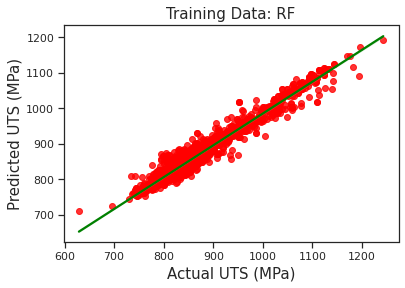

In [113]:
fig,ax=plt.subplots()
y_pred_tr_rf=rf.predict(X_train)
YS=sns.regplot(y_train.iloc[:,1],y_pred_tr_rf[:,1],scatter_kws={"color": "red"}, line_kws={"color": "Green"})
YS.set_xlabel("Actual UTS (MPa)", fontsize = 15)
YS.set_ylabel("Predicted UTS (MPa)", fontsize = 15)

plt.title('Training Data: RF',fontsize=15)

In [114]:
linregress(y_test.iloc[:,2],y_pred_rf[:,2])

LinregressResult(slope=0.7625458131111716, intercept=12.7463446306933, rvalue=0.8864618391915711, pvalue=2.5892505382239398e-89, stderr=0.024642262648245223, intercept_stderr=1.374045267247955)

In [115]:
sum(y_pred_rf[:,2])/len(y_pred_rf[:,2])

54.50660129730852

In [116]:
mean_squared_error(y_test.iloc[:,2],y_pred_rf[:,2],squared=False)

4.868980622684405

Text(0.5, 1.0, 'Testing Data: RF')

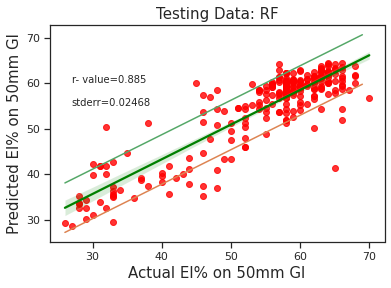

In [117]:
x1=[26,69]
y1=[]
y2=[]
y3=[]
y4=[]
for x in x1:
    y_1=0.758*x+10.1736
    y_2=0.758*x+15.579
    y_3=0.758*x+7.45336
    y_4=0.758*x+18.3346
    y1.append(y_1)
    y2.append(y_2)
    y3.append(y_3)
    y4.append(y_4)
fig,ax=plt.subplots()
YS=sns.regplot(y_test.iloc[:,2],y_pred_rf[:,2],scatter_kws={"color": "red"}, line_kws={"color": "Green"},ax=ax)
YS.set_xlabel("Actual El% on 50mm Gl", fontsize = 15)
YS.set_ylabel("Predicted El% on 50mm Gl", fontsize = 15)
ax.text(27,60, "r- value=0.885", fontsize=10)
ax.text(27,55, "stderr=0.02468", fontsize=10)

# sns.lineplot(x1,y1,ax=ax,palette='g')
# sns.lineplot(x1,y2,ax=ax,palette='g')
sns.lineplot(x1,y3,ax=ax,palette='g')
sns.lineplot(x1,y4,ax=ax,palette='g')
plt.title('Testing Data: RF',fontsize=15)

Text(0.5, 1.0, 'Training Data: RF')

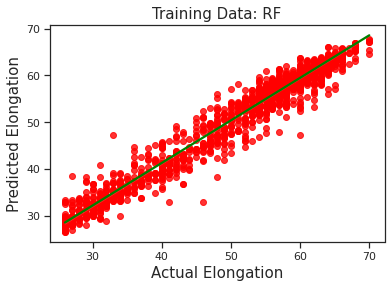

In [118]:
fig,ax=plt.subplots()
YS=sns.regplot(y_train.iloc[:,2],y_pred_tr_rf[:,2],scatter_kws={"color": "red"}, line_kws={"color": "Green"})
YS.set_xlabel("Actual Elongation", fontsize = 15)
YS.set_ylabel("Predicted Elongation", fontsize = 15)

plt.title('Training Data: RF',fontsize=15)

# Evaluation

In [119]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [120]:
y_pred=pd.read_csv("../input/tensile/y_pred_rf.csv")


In [121]:
r2_score(y_test.iloc[:,2],y_pred.iloc[:,5])

0.8071795295197945

In [122]:
mae_ys=mean_absolute_error(y_pred.iloc[:,0],y_pred.iloc[:,3])
rmse_ys=mean_squared_error(y_pred.iloc[:,0],y_pred.iloc[:,3],squared=False)
rrmse_ys=rmse_ys*100/y_pred.iloc[:,0].mean()
r2_mse=r2_score(y_pred.iloc[:,0],y_pred.iloc[:,3])
print(mae_ys)
print(rmse_ys)
print(rrmse_ys)
print(r2_mse)

12.101349824714827
16.563083718844496
3.8694668651010007
0.7004489532109249


In [123]:
mae_ys=mean_absolute_error(y_pred.iloc[:,1],y_pred.iloc[:,4])
rmse_ys=mean_squared_error(y_pred.iloc[:,1],y_pred.iloc[:,4],squared=False)
rrmse_ys=rmse_ys*100/y_pred.iloc[:,1].mean()
r2_mse=r2_score(y_pred.iloc[:,1],y_pred.iloc[:,4])
print(mae_ys)
print(rmse_ys)
print(rrmse_ys)
print(r2_mse)

22.740826472243345
32.74465576986686
3.80171922192914
0.8413799814174879


In [124]:
mae_ys=mean_absolute_error(y_pred.iloc[:,2],y_pred.iloc[:,5])
rmse_ys=mean_squared_error(y_pred.iloc[:,2],y_pred.iloc[:,5],squared=False)
rrmse_ys=rmse_ys*100/y_pred.iloc[:,2].mean()
r2_mse=r2_score(y_pred.iloc[:,2],y_pred.iloc[:,5])
print(mae_ys)
print(rmse_ys)
print(rrmse_ys)
print(r2_mse)

3.356101912547528
4.60588743672186
8.410389473428099
0.8071795296682572


In [125]:
a=np.array([[12.10,16.56,3.87,0.70],[22.74,32.74,3.80,0.84],[3.35,4.60,8.41,0.81]])
b=a.T
b

array([[12.1 , 22.74,  3.35],
       [16.56, 32.74,  4.6 ],
       [ 3.87,  3.8 ,  8.41],
       [ 0.7 ,  0.84,  0.81]])

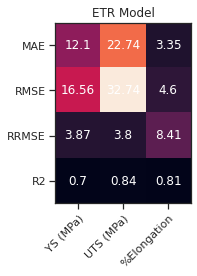

In [126]:
variables=['YS (MPa)','UTS (MPa)','%Elongation']
metrics=['MAE','RMSE','RRMSE','R2']
fig, ax = plt.subplots()
im = ax.imshow(b)

# We want to show all ticks...
ax.set_xticks(np.arange(len(variables)))
ax.set_yticks(np.arange(len(metrics)))

# ... and label them with the respective list entries
ax.set_xticklabels(variables)
ax.set_yticklabels(metrics)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(metrics)):
    for j in range(len(variables)):
        text = ax.text(j, i, b[i, j],
                       ha="center", va="center", color="w")

ax.set_title("ETR Model")
fig.tight_layout()
plt.show()

# ExtraTreesRegressor

In [127]:
from sklearn.metrics import r2_score
log2=[]
for i in range(0,40,1):
    X=df[['Cr%','Sample thk (mm)', 'C%', 'Mn%',  'P%',
       'Si%', 'Ni%','Cu%','Mo%','N %','Md30']]
    y=df[['YS (MPa)','UTS (MPa)','El% on 50mm GL']]
#,'El% on 50mm GL'

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state = i)
    reg = ExtraTreesRegressor()
    reg.fit(X_train,y_train)
    pred_TI = reg.predict(X_test)
    rr = r2_score(y_test, pred_TI)
    print(rr, i)
    log2.append(rr)

0.6163775553280649 0
0.7504862303757173 1
0.6961312615073337 2
0.6737309311566517 3
0.6398716159781718 4
0.6957569501254253 5
0.6583229688761645 6
0.6681721864585639 7
0.7187202543258673 8
0.7174808020011089 9
0.6495324280977867 10
0.708327327677969 11
0.6676907085849031 12
0.7389263794832482 13
0.6402942488409085 14
0.6577208551552258 15
0.6511171207768688 16
0.6876382980912776 17
0.6644689517621732 18
0.6480309261977736 19
0.6398185974063685 20
0.7249094679546816 21
0.7319616298848274 22
0.6826068154150992 23
0.6593223344823875 24
0.6540044006517007 25
0.6994231194182879 26
0.7110080480142634 27
0.6383996633001314 28
0.7061968664051653 29
0.6584195789409891 30
0.6973680526469227 31
0.6543905126455275 32
0.6692559791593305 33
0.7355966784816875 34
0.674149909522289 35
0.7358453031283195 36
0.7152968589296055 37
0.703750467421858 38
0.6654232275462502 39


In [128]:
max(log2)

0.7504862303757173

In [129]:
X=df[['Cr%','Sample thk (mm)', 'C%', 'Mn%',  'P%',
       'Si%', 'Ni%', 'Cu%','Mo%', 'N %']]
y=df[['YS (MPa)','UTS (MPa)','El% on 50mm GL']]
#,'El% on 50mm GL'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state = 1)

In [130]:
model1=ExtraTreesRegressor()
model1.fit(X_train,y_train)

ExtraTreesRegressor()

In [131]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 40, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 1)]

# Minimum number of samples required to split a node
min_samples_split = [2, 3,4,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,3,4,5]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 3, 4, 5],
 'min_samples_split': [2, 3, 4, 5],
 'n_estimators': [40, 91, 142, 193, 244, 295, 346, 397, 448, 500]}


In [132]:
ETR_random = RandomizedSearchCV(estimator = model1, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=0, n_jobs = -1)
# Fit the random search model
ETR_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=500; total time=   1.4s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=40; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=40; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=193; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=193; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=295; total time=   1.3s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=295; to

RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [40, 91, 142, 193, 244,
                                                         295, 346, 397, 448,
                                                         500]},
                   random_state=0, verbose=2)

In [133]:
ETR_random.score(X_test,y_test)

0.6541856203681072

In [134]:
ETR_random.best_params_

{'n_estimators': 193,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': False}

In [135]:
model1.score(X_train,y_train)

0.9826406650347632

In [136]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=0, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=295; total time=   1.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=448; total time=   1.3s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=397; total time=   1.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=193; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=193; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   1.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=346; 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [40, 91, 142, 193, 244,
                                                         295, 346, 397, 448,
                                                         500]},
                   random_state=0, verbose=2)

In [137]:
rf_random.best_params_

{'n_estimators': 448,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [138]:
rf_random.score(X_test,y_test)

0.6624920664202493

In [139]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = random_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [140]:
# grid_search.fit(X_train,y_train)

In [141]:
rf_random.score(X_test,y_test)

0.6624920664202493

In [142]:
y_et_tr=model1.predict(X_train)

In [143]:
# grid_search.best_params_

In [144]:
# grid_search.score(X_test,y_test)

In [145]:
# grid_search.score(X_train,y_train)

In [146]:
y_et=model1.predict(X_test)
r2_score(y_test,y_et)

0.750633504808428

In [147]:
y_et=model1.predict(X_test)
from scipy import stats
from scipy.stats import linregress
linregress(y_test.iloc[:,0],y_et[:,0])

LinregressResult(slope=0.7791023574613887, intercept=94.27977692631032, rvalue=0.8192783120027419, pvalue=5.440590798804764e-65, stderr=0.03375184475279382, intercept_stderr=14.478392620482717)

In [148]:
r2_score(y_test.iloc[:,0],y_et[:,0])

0.6537727356874456

Text(0.5, 1.0, 'Testing Data')

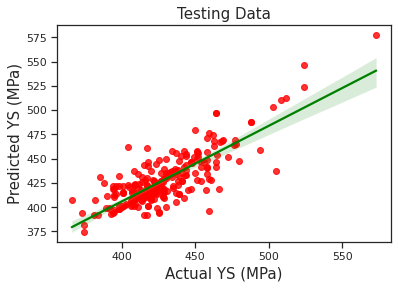

In [149]:
fig,ax=plt.subplots()
YS=sns.regplot(y_test.iloc[:,0],y_et[:,0],scatter_kws={"color": "red"}, line_kws={"color": "Green"},ci=95)
YS.set_xlabel("Actual YS (MPa)", fontsize = 15)
YS.set_ylabel("Predicted YS (MPa)", fontsize = 15)

plt.title('Testing Data',fontsize=15)

In [150]:
yt=model1.predict(X_train)
linregress(y_train.iloc[:,0],yt[:,0])

LinregressResult(slope=0.9709935658520481, intercept=12.39539869260119, rvalue=0.9853900577193014, pvalue=0.0, stderr=0.003450958804535546, intercept_stderr=1.478278679751766)

In [151]:
r2_score(y_train.iloc[:,0],yt[:,0])

0.9709935657445401

### Checking which test_size is better for modelling

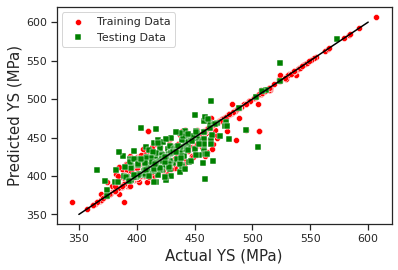

In [152]:
fig,ax =plt.subplots()
x1=[350,600]
for x in x1:
    y1=x1
sns.scatterplot(y_train.iloc[:,0],yt[:,0],color='red', marker="o", label='Training Data',ax=ax)
sns.scatterplot(y_test.iloc[:,0],y_et[:,0],color='green', marker="s", label='Testing Data',ax=ax)
sns.lineplot(x1,y1,ax=ax,color='black')
# plt.x_label("Actual YS (MPa)", fontsize = 15)
# ax.set(xlabel="Actual YS (MPa)",ylabel="Predicted YS (MPa)")
plt.xlabel("Actual YS (MPa)", fontsize=15)
plt.ylabel("Predicted YS (MPa)", fontsize=15)
plt.legend(loc='upper left');
plt.show()


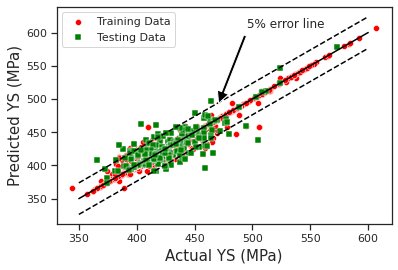

In [153]:
fig,ax =plt.subplots()
x1=[350,600]
y=[350,600]
x2=[326.25,576.25]
x3=[373.75,623.75]
for x in x1:
    y1=x1
    y2=x2
    y3=x3
sns.scatterplot(y_train.iloc[:,0],yt[:,0],color='red', marker="o", label='Training Data',ax=ax)
sns.scatterplot(y_test.iloc[:,0],y_et[:,0],color='green', marker="s", label='Testing Data',ax=ax)
sns.lineplot(x1,y1,ax=ax,color='black')
sns.lineplot(x1,y2,ax=ax,linestyle='dashed',color='black')
sns.lineplot(x1,y3,ax=ax,linestyle='dashed',color='black')
ax.annotate('5% error line',
            xy=(470, 490), xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.03,width=3),
            horizontalalignment='right', verticalalignment='top')
# ax.set(xlabel="Actual YS (MPa)",ylabel="Predicted YS (MPa)")
plt.xlabel("Actual YS (MPa)", fontsize=15)
plt.ylabel("Predicted YS (MPa)", fontsize=15)
plt.legend(loc='upper left');
plt.show()


Text(0.5, 1.0, 'Training Data: ETR model')

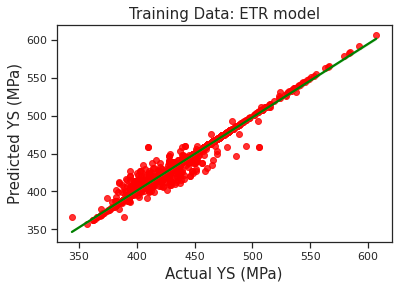

In [154]:
fig,ax=plt.subplots()
YS=sns.regplot(y_train.iloc[:,0],yt[:,0],scatter_kws={"color": "red"}, line_kws={"color": "Green"})
YS.set_xlabel("Actual YS (MPa)", fontsize = 15)
YS.set_ylabel("Predicted YS (MPa)", fontsize = 15)

plt.title('Training Data: ETR model',fontsize=15)

In [155]:
linregress(y_test.iloc[:,1],y_et[:,1])

LinregressResult(slope=0.898436719897208, intercept=88.19262590171661, rvalue=0.9147304426253927, pvalue=1.0357489475573891e-104, stderr=0.02456546178898926, intercept_stderr=21.070511395986706)

In [156]:
r2_score(y_test.iloc[:,1],y_et[:,1])

0.8318073699335573

Text(0.5, 1.0, 'Testing Data')

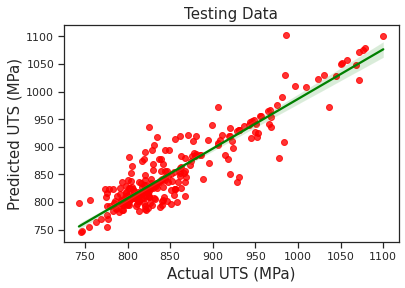

In [157]:
fig,ax=plt.subplots()
YS=sns.regplot(y_test.iloc[:,1],y_et[:,1],scatter_kws={"color": "red"}, line_kws={"color": "Green"})
YS.set_xlabel("Actual UTS (MPa)", fontsize = 15)
YS.set_ylabel("Predicted UTS (MPa)", fontsize = 15)

plt.title('Testing Data',fontsize=15)

Text(0.5, 1.0, 'Training Data: ETR model')

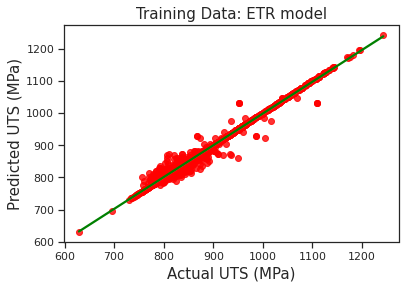

In [158]:
fig,ax=plt.subplots()
YS=sns.regplot(y_train.iloc[:,1],yt[:,1],scatter_kws={"color": "red"}, line_kws={"color": "Green"})
YS.set_xlabel("Actual UTS (MPa)", fontsize = 15)
YS.set_ylabel("Predicted UTS (MPa)", fontsize = 15)

plt.title('Training Data: ETR model',fontsize=15)

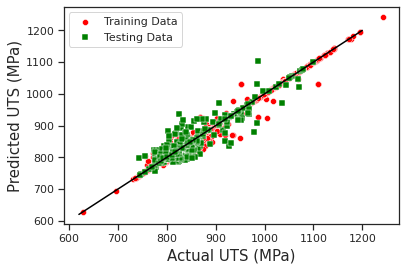

In [159]:
fig,ax =plt.subplots()
x1=[620,1200]
for x in x1:
    y1=x1
sns.scatterplot(y_train.iloc[:,1],yt[:,1],color='red', marker="o", label='Training Data',ax=ax)
sns.scatterplot(y_test.iloc[:,1],y_et[:,1],color='green', marker="s", label='Testing Data',ax=ax)
sns.lineplot(x1,y1,ax=ax,color='black')
# # plt.x_label("Actual YS (MPa)", fontsize = 15)
# ax.set(xlabel="Actual UTS (MPa)",ylabel="Predicted UTS (MPa)")
plt.xlabel("Actual UTS (MPa)", fontsize=15)
plt.ylabel("Predicted UTS (MPa)", fontsize=15)
plt.legend(loc='upper left');
plt.show()

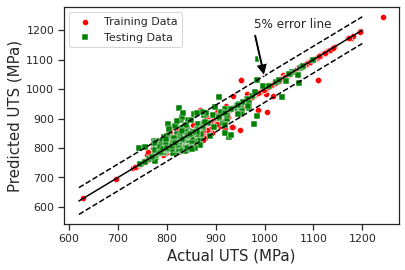

In [160]:
fig,ax =plt.subplots()
x1=[620,1200]
y=[620,1200]
x2=[574.5,1154.5]
x3=[665.5,1245.5]
for x in x1:
    y1=x1
    y2=x2
    y3=x3
sns.scatterplot(y_train.iloc[:,1],yt[:,1],color='red', marker="o", label='Training Data',ax=ax)
sns.scatterplot(y_test.iloc[:,1],y_et[:,1],color='green', marker="s", label='Testing Data',ax=ax)
sns.lineplot(x1,y1,ax=ax,color='black')
sns.lineplot(x1,y2,ax=ax,linestyle='dashed',color='black')
sns.lineplot(x1,y3,ax=ax,linestyle='dashed',color='black')
ax.annotate('5% error line',
            xy=(1000, 1040), xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.03,width=3),
            horizontalalignment='right', verticalalignment='top')
# ax.set(xlabel="Actual UTS (MPa)",ylabel="Predicted UTS (MPa)")
plt.xlabel("Actual UTS (MPa)", fontsize=15)
plt.ylabel("Predicted UTS (MPa)", fontsize=15)
plt.legend(loc='upper left');
plt.show()

In [161]:
r2_score(y_train.iloc[:,2],y_et_tr[:,2])

0.9895554935346319

In [162]:
r2_score(y_test.iloc[:,2],y_et[:,2])

0.7663204088042813

Text(0.5, 1.0, 'Testing Data')

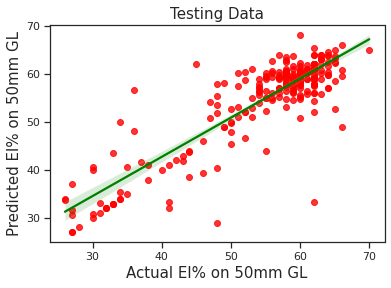

In [163]:
fig,ax=plt.subplots()
YS=sns.regplot(y_test.iloc[:,2],y_et[:,2],scatter_kws={"color": "red"}, line_kws={"color": "Green"})
YS.set_xlabel("Actual El% on 50mm GL", fontsize = 15)
YS.set_ylabel("Predicted El% on 50mm GL", fontsize = 15)

plt.title('Testing Data',fontsize=15)

Text(0.5, 1.0, 'Training Data: ETR')

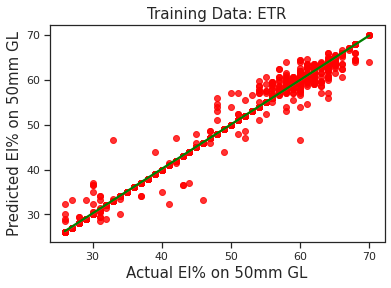

In [164]:
fig,ax=plt.subplots()
YS=sns.regplot(y_train.iloc[:,2],yt[:,2],scatter_kws={"color": "red"}, line_kws={"color": "Green"})
YS.set_xlabel("Actual El% on 50mm GL", fontsize = 15)
YS.set_ylabel("Predicted El% on 50mm GL", fontsize = 15)

plt.title('Training Data: ETR',fontsize=15)

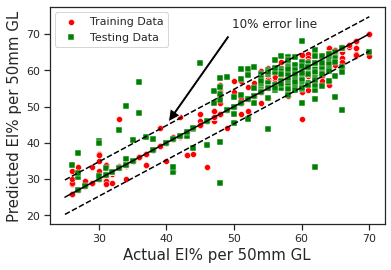

In [165]:
fig,ax =plt.subplots()
x1=[25,70]
y=[25,70]
x2=[27.35,72.375]
x3=[22.625,67.625]
x4=[29.75,74.75]
x5=[20.25,65.25]
for x in x1:
    y1=x1
    y2=x2
    y3=x3
    y4=x4
    y5=x5
sns.scatterplot(y_train.iloc[:,2],yt[:,2],color='red', marker="o", label='Training Data',ax=ax)
sns.scatterplot(y_test.iloc[:,2],y_et[:,2],color='green', marker="s", label='Testing Data',ax=ax)
sns.lineplot(x1,y1,ax=ax,color='black')
# sns.lineplot(x1,y2,ax=ax,linestyle='dashed',color='black')
# sns.lineplot(x1,y3,ax=ax,linestyle='dashed',color='black')
sns.lineplot(x1,y4,ax=ax,linestyle='dashed',color='black')
sns.lineplot(x1,y5,ax=ax,linestyle='dashed',color='black')
# ax.set(xlabel="Actual El% per 50mm GL)",ylabel="Predicted El% per 50mm GL")
plt.xlabel("Actual El% per 50mm GL", fontsize=15)
plt.ylabel("Predicted El% per 50mm GL", fontsize=15)

ax.annotate('10% error line',
            xy=(40, 45), xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.03,width=3),
            horizontalalignment='right', verticalalignment='top')
plt.legend(loc='upper left');
plt.show()

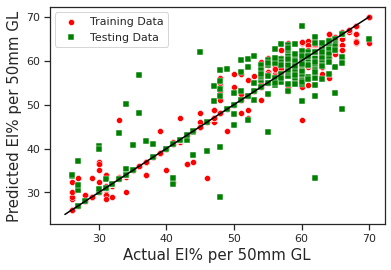

In [166]:
fig,ax =plt.subplots()
x1=[25,70]
for x in x1:
    y1=x1
sns.scatterplot(y_train.iloc[:,2],yt[:,2],color='red', marker="o", label='Training Data',ax=ax)
sns.scatterplot(y_test.iloc[:,2],y_et[:,2],color='green', marker="s", label='Testing Data',ax=ax)
sns.lineplot(x1,y1,ax=ax,color='black')
# plt.x_label("Actual YS (MPa)", fontsize = 15)
# ax.set(xlabel="Actual El% per 50mm GL",ylabel="Predicted El% per 50mm GL")
plt.xlabel("Actual El% per 50mm GL", fontsize=15)
plt.ylabel("Predicted El% per 50mm GL", fontsize=15)

plt.legend(loc='upper left');
plt.show()

In [167]:
# model1=ExtraTreesRegressor(warm_start= False,
#     n_estimators= 40,min_samples_split=3,
#  min_samples_leaf=1,
#  max_features= 'sqrt',
#  max_depth =18,
#  criterion= 'mse',
#  bootstrap= False)
# #n_estimators=56,min_samples_split=3,max_features=5,
# model1.fit(X_train,y_train)
yt=model1.predict(X_train)

In [168]:
print(r2_score(y_train.iloc[:,0],yt[:,0]))
print(r2_score(y_train.iloc[:,1],yt[:,1]))
print(r2_score(y_train.iloc[:,2],yt[:,2]))

0.9709935657445401
0.9873729358251175
0.9895554935346319


In [169]:
linregress(y_test.iloc[:,1],y_et[:,1])

LinregressResult(slope=0.898436719897208, intercept=88.19262590171661, rvalue=0.9147304426253927, pvalue=1.0357489475573891e-104, stderr=0.02456546178898926, intercept_stderr=21.070511395986706)

In [170]:
# y_train=y_train.drop([1810],axis=0

Text(0.5, 1.0, 'Training Data')

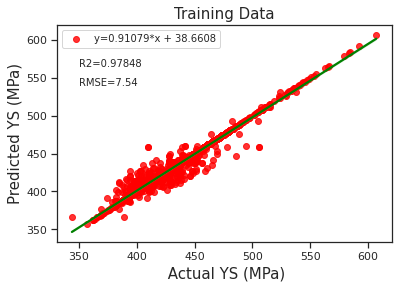

In [171]:

fig, ax = plt.subplots()
slope, intercept, r_value, pv, se = stats.linregress(y_train.iloc[:,0],yt[:,0])
YS=sns.regplot(y_train.iloc[:,0],yt[:,0],scatter_kws={"color": "red"}, line_kws={"color": "Green"},)
YS.set_xlabel(" Actual YS (MPa)", fontsize = 15)
YS.set_ylabel("Predicted YS (MPa)", fontsize = 15)
ax.text(350,565, "R2=0.97848", fontsize=10)
ax.text(350,540, "RMSE=7.54", fontsize=10)
plt.legend(labels=['y=0.91079*x + 38.6608'],fontsize = 10)
plt.title('Training Data',fontsize=15)
#plt.grid()

# Evaluation of ExtraTrees

In [172]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error
et=pd.read_csv("../input/tensile/y_et.csv")

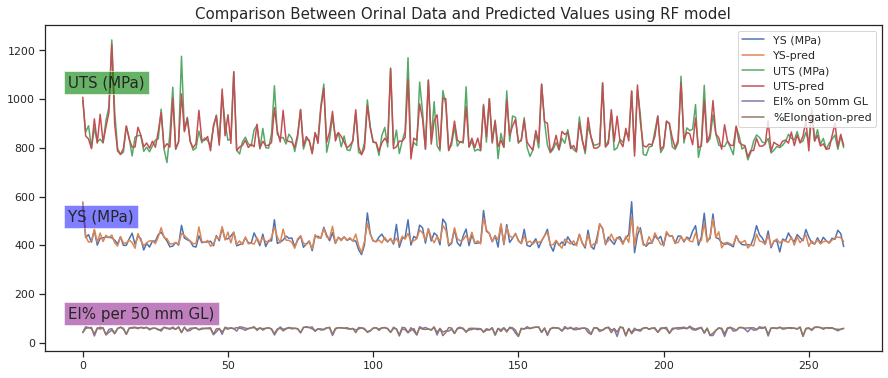

In [173]:
x_ax = range(len(X_test))
f, ax = plt.subplots(1, 1, figsize = (15, 6))
plt.plot(x_ax, et.iloc[:,3],  label="YS (MPa)")
plt.plot(x_ax, et.iloc[:,0], label="YS-pred")
plt.plot(x_ax, et.iloc[:,4],label="UTS (MPa)")
plt.plot(x_ax, et.iloc[:,1], label="UTS-pred")
plt.plot(x_ax, et.iloc[:,5], label="El% on 50mm GL ")
plt.plot(x_ax, et.iloc[:,2], label="%Elongation-pred")
plt.title('Comparison Between Orinal Data and Predicted Values using RF model',fontsize=15)
ax.text(-5,1050, "UTS (MPa)",bbox=dict(facecolor='green', alpha=0.6), fontsize=15)
ax.text(-5,500, "YS (MPa)",bbox=dict(facecolor='blue', alpha=0.5), fontsize=15)
ax.text(-5,100, "El% per 50 mm GL)",bbox=dict(facecolor='purple', alpha=0.5), fontsize=15)
plt.legend()

plt.show()

# YS

In [174]:

mae_ys=mean_absolute_error(et.iloc[:,3],et.iloc[:,0])
rmse_ys=mean_squared_error(et.iloc[:,3],et.iloc[:,0],squared=False)
rrmse_ys=rmse_ys*100/et.iloc[:,3].mean()
r2_mse=r2_score(et.iloc[:,3],et.iloc[:,0])
print(mae_ys)
print(rmse_ys)
print(rrmse_ys)
print(r2_mse)

12.494824072623574
17.265746829893473
4.037675872297541
0.6951765265321013


In [175]:
linregress(y_train.iloc[:,0],yt[:,0])

LinregressResult(slope=0.9709935658520481, intercept=12.39539869260119, rvalue=0.9853900577193014, pvalue=0.0, stderr=0.003450958804535546, intercept_stderr=1.478278679751766)

# UTS

In [176]:
mae_ys=mean_absolute_error(et.iloc[:,4],et.iloc[:,1])
rmse_ys=mean_squared_error(et.iloc[:,4],et.iloc[:,1],squared=False)
rrmse_ys=rmse_ys*100/et.iloc[:,4].mean()
r2_mse=r2_score(et.iloc[:,4],et.iloc[:,1])
print(mae_ys)
print(rmse_ys)
print(rrmse_ys)
print(r2_mse)

22.560804449429657
33.4829775734455
3.909826088148972
0.8394077444935178


# Elongation

In [177]:
mae_ys=mean_absolute_error(et.iloc[:,5],et.iloc[:,2])
rmse_ys=mean_squared_error(et.iloc[:,5],et.iloc[:,2],squared=False)
rrmse_ys=rmse_ys*100/et.iloc[:,5].mean()
r2_mse=r2_score(et.iloc[:,5],et.iloc[:,2])
print(mae_ys)
print(rmse_ys)
print(rrmse_ys)
print(r2_mse)

3.314053378707224
4.711331809700377
8.521286472396666
0.7583929689111515


In [178]:
d=np.array([[12.494,17.265,4.037,0.6952],[22.56,33.482,3.91,0.84],[3.314,4.711,8.521,0.76]])
e=d.T
e

array([[12.494 , 22.56  ,  3.314 ],
       [17.265 , 33.482 ,  4.711 ],
       [ 4.037 ,  3.91  ,  8.521 ],
       [ 0.6952,  0.84  ,  0.76  ]])

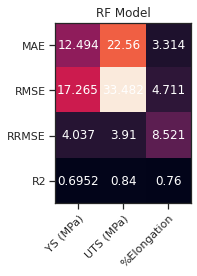

In [179]:



variables=['YS (MPa)','UTS (MPa)','%Elongation']
metrics=['MAE','RMSE','RRMSE','R2']
fig, ax = plt.subplots()
im = ax.imshow(e)

# We want to show all ticks...
ax.set_xticks(np.arange(len(variables)))
ax.set_yticks(np.arange(len(metrics)))

# ... and label them with the respective list entries
ax.set_xticklabels(variables)
ax.set_yticklabels(metrics)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(metrics)):
    for j in range(len(variables)):
        text = ax.text(j, i, e[i, j],
                       ha="center", va="center", color="w")

ax.set_title("RF Model")
fig.tight_layout()
plt.show()

In [180]:
err_ys=(et.iloc[:,3]-et.iloc[:,0])/et.iloc[:,3]*100

In [181]:
err1=abs(err_ys)
err1

0      1.063097
1      1.363401
2      6.950688
3      1.231316
4      1.098024
         ...   
258    1.733175
259    1.502635
260    6.108004
261    3.581473
262    5.221353
Length: 263, dtype: float64

In [182]:
sum(err1)/len(err1)

2.876141271624649

Text(0.5, 1.0, 'Yield Strength')

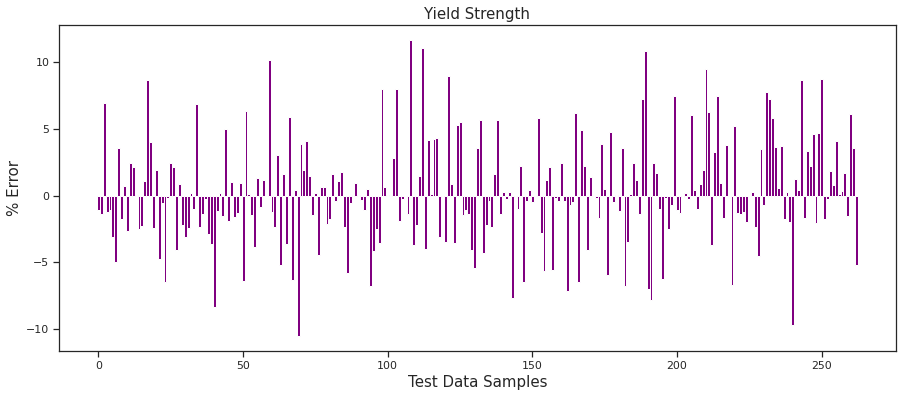

In [183]:


x=[y for y in range(1,264,1)]
w=1

bar1=np.arange(len(x))
fig,ax=plt.subplots(figsize=(15,6))
plt.bar(bar1,err_ys,w,label='YS (MPa)',color='purple')

#plt.xticks(bar1,x)
plt.xlabel('Test Data Samples',fontsize=15)
plt.ylabel('% Error',fontsize=15)
plt.title('Yield Strength',fontsize=15)

In [184]:
err_uts=(et.iloc[:,4]-et.iloc[:,1])/et.iloc[:,4]*100

In [185]:
err_uts.shape

(263,)

Text(0.5, 1.0, 'Ultimate Tensile Strength')

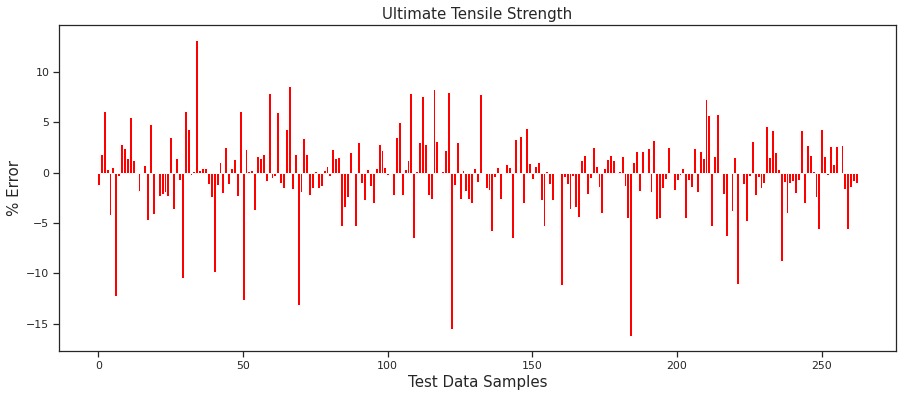

In [186]:
x=[y for y in range(1,264,1)]
w=1

bar1=np.arange(len(x))
fig,ax=plt.subplots(figsize=(15,6))
plt.bar(bar1,err_uts,w,label='YS (MPa)',color='red')

#plt.xticks(bar1,x)
plt.xlabel('Test Data Samples',fontsize=15)
plt.ylabel('% Error',fontsize=15)
plt.title('Ultimate Tensile Strength',fontsize=15)

In [187]:
measured=y_test.iloc[:,0]
actual=y_et[:,0]
err_uts=(actual -measured)/actual*100

In [188]:
err_uts.shape

(263,)

Text(0.5, 1.0, 'El% on 50mm GL')

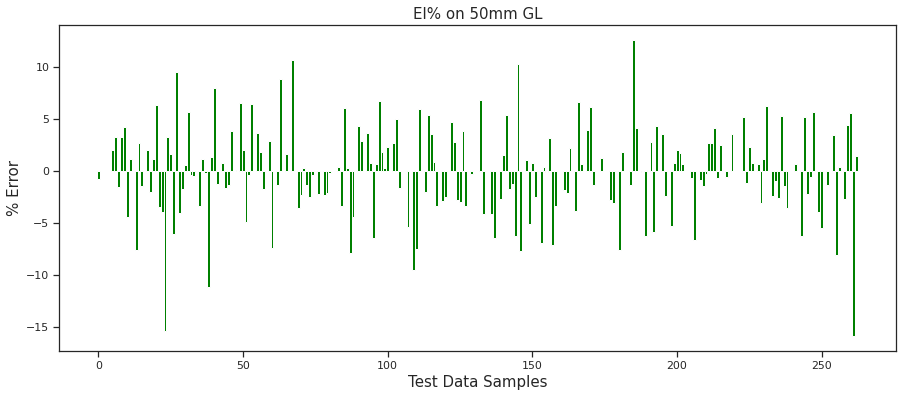

In [189]:
x=[y for y in range(1,264,1)]
w=1

bar1=np.arange(len(x))
fig,ax=plt.subplots(figsize=(15,6))
plt.bar(bar1,err_uts,w,color='green')

#plt.xticks(bar1,x)
plt.xlabel('Test Data Samples',fontsize=15)
plt.ylabel('% Error',fontsize=15)
plt.title('El% on 50mm GL',fontsize=15)

In [190]:
df.columns

Index(['Sample thk (mm)', 'YS (MPa)', 'UTS (MPa)', 'C%', 'Mn%', 'S%', 'P%',
       'Si%', 'Ni%', 'Cr%', 'Cu%', 'Mo%', 'N2 (ppm)', 'B%', 'Pb (ppm)',
       'Sn (pppm)', 'Cu+Ni', 'Grain Size', 'El% on 50mm GL', 'N %', 'Md30',
       'MS', 'Ni-eq', 'Cr-eq', 'Ni-eq/Cr-eq'],
      dtype='object')

In [191]:
df.drop(['B%', 'Pb (ppm)',
       'Sn (pppm)', 'Cu+Ni','S%'],inplace=True,axis=1)

# TO Plot MIV feature importance

In [192]:
X_train['Cr_plus']=X_train['Cr%']+0.1*X_train['Cr%']
X_train['Cr_minus']=X_train['Cr%']-0.1*X_train['Cr%']
X_train['sam_plus']=X_train['Sample thk (mm)']+0.1*X_train['Sample thk (mm)']
X_train['sam_minus']=X_train['Sample thk (mm)']-0.1*X_train['Sample thk (mm)']
X_train['C_plus']=X_train['C%']+0.1*X_train['C%']
X_train['C-minus']=X_train['C%']-0.1*X_train['C%']
X_train['Mn_plus']=X_train['Mn%']+0.1*X_train['Mn%']
X_train['Mn_minus']=X_train['Mn%']-0.1*X_train['Mn%']
X_train['P_plus']=X_train['P%']+0.1*X_train['P%']
X_train['P_minus']=X_train['P%']-0.1*X_train['P%']
X_train['Si_plus']=X_train['Si%']+0.1*X_train['Si%']
X_train['Si_minus']=X_train['Si%']-0.1*X_train['Si%']
X_train['Ni_plus']=X_train['Ni%']+0.1*X_train['Ni%']
X_train['Ni_minus']=X_train['Ni%']-0.1*X_train['Ni%']
X_train['Cu_plus']=X_train['Cu%']+0.1*X_train['Cu%']
X_train['Cu_minus']=X_train['Cu%']-0.1*X_train['Cu%']
X_train['Mo_plus']=X_train['Mo%']+0.1*X_train['Mo%']
X_train['Mo_minus']=X_train['Mo%']-0.1*X_train['Mo%']
# X_train['Grain_plus']=X_train['Grain Size']+0.1*X_train['Grain Size']
# X_train['Grain_minus']=X_train['Grain Size']-0.1*X_train['Grain Size']
X_train['N_plus']=X_train['N %']+0.1*X_train['N %']
X_train['N_minus']=X_train['N %']-0.1*X_train['N %']


In [193]:
cr1=X_train[['Cr_plus', 'Sample thk (mm)', 'C%', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo%',
        'N %']]
cr2=X_train[['Cr_minus', 'Sample thk (mm)', 'C%', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo%',
        'N %']]
sam1=X_train[['Cr%', 'sam_plus', 'C%', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo%',
       'N %']]
sam2=X_train[['Cr%', 'sam_minus', 'C%', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo%', 'N %']]
c1=X_train[['Cr%', 'Sample thk (mm)', 'C_plus', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo%',
        'N %']]
c2=X_train[['Cr%', 'Sample thk (mm)', 'C-minus', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo%',
        'N %']]
M1=X_train[['Cr%', 'Sample thk (mm)', 'C%', 'Mn_plus', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo%',
        'N %']]
M2=X_train[['Cr%', 'Sample thk (mm)', 'C%', 'Mn_minus', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo%',
        'N %']]
P1=X_train[['Cr%', 'Sample thk (mm)', 'C%', 'Mn%', 'P_plus', 'Si%', 'Ni%', 'Cu%', 'Mo%',
        'N %']]
p2=X_train[['Cr%', 'Sample thk (mm)', 'C%', 'Mn%', 'P_minus', 'Si%', 'Ni%', 'Cu%', 'Mo%',
        'N %']]
s1=X_train[['Cr%', 'Sample thk (mm)', 'C%', 'Mn%', 'P%', 'Si_plus', 'Ni%', 'Cu%', 'Mo%',
        'N %']]
s2=X_train[['Cr%', 'Sample thk (mm)', 'C%', 'Mn%', 'P%', 'Si_minus', 'Ni%', 'Cu%', 'Mo%',
        'N %']]
ni1=X_train[['Cr%', 'Sample thk (mm)', 'C%', 'Mn%', 'P%', 'Si%', 'Ni_plus', 'Cu%', 'Mo%',
       'N %']]
ni2=X_train[['Cr%', 'Sample thk (mm)', 'C%', 'Mn%', 'P%', 'Si%', 'Ni_minus', 'Cu%', 'Mo%',
        'N %']]
cu1=X_train[['Cr%', 'Sample thk (mm)', 'C%', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu_plus', 'Mo%',
       'N %']]
cu2=X_train[['Cr%', 'Sample thk (mm)', 'C%', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu_minus', 'Mo%',
        'N %']]
mo1=X_train[['Cr%', 'Sample thk (mm)', 'C%', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo_plus',
        'N %']]
mo2=X_train[['Cr%', 'Sample thk (mm)', 'C%', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo_minus',
        'N %']]
# grain1=X_train[['Cr%', 'Sample thk (mm)', 'C%', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo%',
#        'Grain_plus', 'N %']]
# grain2=X_train[['Cr%', 'Sample thk (mm)', 'C%', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo%',
#        'Grain_minus', 'N %']]
N1=X_train[['Cr%', 'Sample thk (mm)', 'C%', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo%',
        'N_plus']]
N2=X_train[['Cr%', 'Sample thk (mm)', 'C%', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo%',
        'N_minus']]

In [194]:
X_train

Cr%  Sample thk (mm)     C%    Mn%     P%   Si%   Ni%   Cu%   Mo%  \
770   15.340000             0.61  0.101   9.96  0.090  0.44  0.80  2.01  0.16   
1303  15.080000             0.51  0.104   9.98  0.074  0.42  0.81  1.75  0.06   
2267  15.600000             0.81  0.100   9.94  0.075  0.42  0.68  1.95  0.05   
1948  16.400000             0.89  0.099   8.42  0.056  0.35  1.67  2.01  0.09   
1541  16.120001             1.47  0.088   8.18  0.051  0.34  1.70  2.10  0.10   
...         ...              ...    ...    ...    ...   ...   ...   ...   ...   
1148  16.299999             0.76  0.086   8.10  0.055  0.32  1.55  2.05  0.13   
1092  16.320000             1.26  0.091   8.20  0.053  0.31  1.70  2.12  0.14   
1284  15.100000             0.51  0.110   9.90  0.072  0.48  0.81  1.75  0.05   
362   14.350000             1.00  0.113  10.07  0.062  0.44  0.49  0.65  0.05   
1249  16.110001             0.77  0.087   8.15  0.057  0.27  1.51  2.04  0.10   

         N %    Cr_plus   Cr_minus  sam_plus  sam_minus  C_plus  C-minus  \
770   0.1509  16.874001  13.806000     0.671      0.549  0.1111   0.0909   
1303  0.1590  16.587999  13.572000     0.561      0.459  0.1144   0.0936   
2267  0.1550  17.160000  14.040000     0.891      0.729  0.1100   0.0900   
1948  0.1979  18.039999  14.759999     0.979      0.801  0.1089   0.0891   
1541  0.1775  17.732000  14.508000     1.617      1.323  0.0968   0.0792   
...      ...        ...        ...       ...        ...     ...      ...   
1148  0.1742  17.929998  14.669999     0.836      0.684  0.0946   0.0774   
1092  0.1710  17.952000  14.688000     1.386      1.134  0.1001   0.0819   
1284  0.1575  16.610001  13.590000     0.561      0.459  0.1210   0.0990   
362   0.1650  15.785001  12.915000     1.100      0.900  0.1243   0.1017   
1249  0.1707  17.721001  14.499001     0.847      0.693  0.0957   0.0783   

        Mn_plus  Mn_minus  P_plus  P_minus  Si_plus  Si_minus  Ni_plus  \
770   10.956000  8.964000  0.0990   0.0810    0.484     0.396    0.880   
1303  10.978000  8.981999  0.0814   0.0666    0.462     0.378    0.891   
2267  10.934000  8.945999  0.0825   0.0675    0.462     0.378    0.748   
1948   9.262000  7.578000  0.0616   0.0504    0.385     0.315    1.837   
1541   8.998000  7.362000  0.0561   0.0459    0.374     0.306    1.870   
...         ...       ...     ...      ...      ...       ...      ...   
1148   8.910001  7.290000  0.0605   0.0495    0.352     0.288    1.705   
1092   9.020000  7.380000  0.0583   0.0477    0.341     0.279    1.870   
1284  10.889999  8.910000  0.0792   0.0648    0.528     0.432    0.891   
362   11.077000  9.063000  0.0682   0.0558    0.484     0.396    0.539   
1249   8.964999  7.335000  0.0627   0.0513    0.297     0.243    1.661   

      Ni_minus  Cu_plus  Cu_minus  Mo_plus  Mo_minus   N_plus  N_minus  
770      0.720    2.211     1.809    0.176     0.144  0.16599  0.13581  
1303     0.729    1.925     1.575    0.066     0.054  0.17490  0.14310  
2267     0.612    2.145     1.755    0.055     0.045  0.17050  0.13950  
1948     1.503    2.211     1.809    0.099     0.081  0.21769  0.17811  
1541     1.530    2.310     1.890    0.110     0.090  0.19525  0.15975  
...        ...      ...       ...      ...       ...      ...      ...  
1148     1.395    2.255     1.845    0.143     0.117  0.19162  0.15678  
1092     1.530    2.332     1.908    0.154     0.126  0.18810  0.15390  
1284     0.729    1.925     1.575    0.055     0.045  0.17325  0.14175  
362      0.441    0.715     0.585    0.055     0.045  0.18150  0.14850  
1249     1.359    2.244     1.836    0.110     0.090  0.18777  0.15363  

[2367 rows x 30 columns]

In [195]:
X_train.columns

Index(['Cr%', 'Sample thk (mm)', 'C%', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo%',
       'N %', 'Cr_plus', 'Cr_minus', 'sam_plus', 'sam_minus', 'C_plus',
       'C-minus', 'Mn_plus', 'Mn_minus', 'P_plus', 'P_minus', 'Si_plus',
       'Si_minus', 'Ni_plus', 'Ni_minus', 'Cu_plus', 'Cu_minus', 'Mo_plus',
       'Mo_minus', 'N_plus', 'N_minus'],
      dtype='object')

In [196]:
cr_1=model1.predict(cr1)
cr_2=model1.predict(cr2)
cr_iv=cr_1-cr_2

cr_ys=sum(cr_iv[:,0])/len(cr_iv[:,0])
cr_uts=sum(cr_iv[:,1])/len(cr_iv[:,1])
cr_el=sum(cr_iv[:,2])/len(cr_iv[:,2])
print('ETR')
print([cr_ys,cr_uts,cr_el])


ETR
[-2.5255271792705196, -14.11409477538375, 3.174666877904519]


In [197]:
cr_1=rf.predict(cr1)
cr_2=rf.predict(cr2)
cr_iv=cr_1-cr_2

cr_ys=sum(cr_iv[:,0])/len(cr_iv[:,0])
cr_uts=sum(cr_iv[:,1])/len(cr_iv[:,1])
cr_el=sum(cr_iv[:,2])/len(cr_iv[:,2])
print('RF')
print([cr_ys,cr_uts,cr_el])


RF
[-9.752833237409899, -49.32250639645766, 5.886673555778124]


In [198]:
sam_1=model1.predict(sam1)
sam_2=model1.predict(sam2)
sam_iv=sam_1-sam_2

sam_ys=sum(sam_iv[:,0])/len(sam_iv[:,0])
sam_uts=sum(sam_iv[:,1])/len(sam_iv[:,1])
sam_el=sum(sam_iv[:,2])/len(sam_iv[:,2])
print('ETR')
print([sam_ys,sam_uts,sam_el])


ETR
[0.9500450640754793, 0.2899140966061101, -0.22155330235178108]


In [199]:
sam_1=rf.predict(sam1)
sam_2=rf.predict(sam2)
sam_iv=sam_1-sam_2

sam_ys=sum(sam_iv[:,0])/len(sam_iv[:,0])
sam_uts=sum(sam_iv[:,1])/len(sam_iv[:,1])
sam_el=sum(sam_iv[:,2])/len(sam_iv[:,2])
print('RF')
print([sam_ys,sam_uts,sam_el])


RF
[1.1744033653878385, 1.0626470742795262, -0.1765359776471939]


In [200]:
C_1=model1.predict(c1)
C_2=model1.predict(c2)
c_iv=C_1-C_2
c_ys=sum(c_iv[:,0])/len(c_iv[:,0])
c_uts=sum(c_iv[:,1])/len(c_iv[:,1])
c_el=sum(c_iv[:,2])/len(c_iv[:,2])
print('ETR')
print([c_ys,c_uts,c_el])


ETR
[1.0655971694127608, -0.3586680045064087, -0.12893796648359457]


In [201]:
C_1=rf.predict(c1)
C_2=rf.predict(c2)
c_iv=C_1-C_2
c_ys=sum(c_iv[:,0])/len(c_iv[:,0])
c_uts=sum(c_iv[:,1])/len(c_iv[:,1])
c_el=sum(c_iv[:,2])/len(c_iv[:,2])
print('RF')
print([c_ys,c_uts,c_el])

RF
[1.2954635886106118, 2.1648105698108795, -0.047841028039696955]


In [202]:
M_1=model1.predict(M1)
M_2=model1.predict(M2)
m_iv=M_1-M_2
M_ys=sum(m_iv[:,0])/len(m_iv[:,0])
M_uts=sum(m_iv[:,1])/len(m_iv[:,1])
M_el=sum(m_iv[:,2])/len(m_iv[:,2])
print('ETR')
print([M_ys,M_uts,M_el])


ETR
[3.9427233488241016, 1.6757755245740003, -0.21133354457118608]


In [203]:
M_1=rf.predict(M1)
M_2=rf.predict(M2)
m_iv=M_1-M_2
M_ys=sum(m_iv[:,0])/len(m_iv[:,0])
M_uts=sum(m_iv[:,1])/len(m_iv[:,1])
M_el=sum(m_iv[:,2])/len(m_iv[:,2])
print('RF')
print([M_ys,M_uts,M_el])


RF
[7.288638009352531, 4.748759383190624, -0.2673916277357336]


In [204]:
p_1=model1.predict(P1)
p_2=model1.predict(p2)
p_iv=p_1-p_2
P_ys=sum(p_iv[:,0])/len(p_iv[:,0])
P_uts=sum(p_iv[:,1])/len(p_iv[:,1])
P_el=sum(p_iv[:,2])/len(p_iv[:,2])
print('ETR')
print([P_ys,P_uts,P_el])


ETR
[0.26018898746655345, 0.27901689902830684, 0.05662737642585548]


In [205]:
p_1=rf.predict(P1)
p_2=rf.predict(p2)
p_iv=p_1-p_2
P_ys=sum(p_iv[:,0])/len(p_iv[:,0])
P_uts=sum(p_iv[:,1])/len(p_iv[:,1])
P_el=sum(p_iv[:,2])/len(p_iv[:,2])
print('RF')
print([P_ys,P_uts,P_el])

RF
[-0.5732369416599461, -0.5364956545355761, 0.20647161060785899]


In [206]:
si_1=model1.predict(s1)
si_2=model1.predict(s2)
si_iv=si_1-si_2
Si_ys=sum(si_iv[:,0])/len(si_iv[:,0])
Si_uts=sum(si_iv[:,1])/len(si_iv[:,1])
Si_el=sum(si_iv[:,2])/len(si_iv[:,2])
print('ETR')
print([Si_ys,Si_uts,Si_el])


ETR
[0.05670215462611015, -0.32627108857907333, 0.19544866920152085]


In [207]:
si_1=rf.predict(s1)
si_2=rf.predict(s2)
si_iv=si_1-si_2
Si_ys=sum(si_iv[:,0])/len(si_iv[:,0])
Si_uts=sum(si_iv[:,1])/len(si_iv[:,1])
Si_el=sum(si_iv[:,2])/len(si_iv[:,2])
print('RF')
print([Si_ys,Si_uts,Si_el])


RF
[0.21419429942212284, 0.1378662422284123, 0.33380600184212356]


In [208]:
ni_1=model1.predict(ni1)
ni_2=model1.predict(ni2)
ni_iv=ni_1-ni_2
Ni_ys=sum(ni_iv[:,0])/len(ni_iv[:,0])
Ni_uts=sum(ni_iv[:,1])/len(ni_iv[:,1])
Ni_el=sum(ni_iv[:,2])/len(ni_iv[:,2])
print('ETR')
print([Ni_ys,Ni_uts,Ni_el])


ETR
[-4.0771389945078145, -3.6976461765948443, 0.1890752006759623]


In [209]:
ni_1=rf.predict(ni1)
ni_2=rf.predict(ni2)
ni_iv=ni_1-ni_2
Ni_ys=sum(ni_iv[:,0])/len(ni_iv[:,0])
Ni_uts=sum(ni_iv[:,1])/len(ni_iv[:,1])
Ni_el=sum(ni_iv[:,2])/len(ni_iv[:,2])
print('RF')
print([Ni_ys,Ni_uts,Ni_el])


RF
[-3.339869174422732, -4.5568241731394314, -0.08484575780741806]


In [210]:
cu_1=model1.predict(cu1)
cu_2=model1.predict(cu2)
cu_iv=cu_1-cu_2
Cu_ys=sum(cu_iv[:,0])/len(cu_iv[:,0])
Cu_uts=sum(cu_iv[:,1])/len(cu_iv[:,1])
Cu_el=sum(cu_iv[:,2])/len(cu_iv[:,2])
print('ETR')
print([Cu_ys,Cu_uts,Cu_el])


ETR
[-5.6546102661597, -13.153185114772613, 0.4790152795380934]


In [211]:
cu_1=rf.predict(cu1)
cu_2=rf.predict(cu2)
cu_iv=cu_1-cu_2
Cu_ys=sum(cu_iv[:,0])/len(cu_iv[:,0])
Cu_uts=sum(cu_iv[:,1])/len(cu_iv[:,1])
Cu_el=sum(cu_iv[:,2])/len(cu_iv[:,2])
print('RF')
print([Cu_ys,Cu_uts,Cu_el])

RF
[-4.590285407792695, -9.29811808058861, 0.3472203378464469]


In [212]:
mo_1=model1.predict(mo1)
mo_2=model1.predict(mo2)
mo_iv=mo_1-mo_2
Mo_ys=sum(mo_iv[:,0])/len(mo_iv[:,0])
Mo_uts=sum(mo_iv[:,1])/len(mo_iv[:,1])
Mo_el=sum(mo_iv[:,2])/len(mo_iv[:,2])
print('ETR')
print([Mo_ys,Mo_uts,Mo_el])


ETR
[0.009927967891845815, 0.9666912406703273, 0.018569990142233365]


In [213]:
mo_1=rf.predict(mo1)
mo_2=rf.predict(mo2)
mo_iv=mo_1-mo_2
Mo_ys=sum(mo_iv[:,0])/len(mo_iv[:,0])
Mo_uts=sum(mo_iv[:,1])/len(mo_iv[:,1])
Mo_el=sum(mo_iv[:,2])/len(mo_iv[:,2])
print('RF')
print([Mo_ys,Mo_uts,Mo_el])

RF
[-0.004449188456477286, 1.3090028209245588, 0.022551464003301873]


In [214]:
N_1=model1.predict(N1)
N_2=model1.predict(N2)
n_iv=N_1-N_2
N_ys=sum(n_iv[:,0])/len(n_iv[:,0])
N_uts=sum(n_iv[:,1])/len(n_iv[:,1])
N_el=sum(n_iv[:,2])/len(n_iv[:,2])
print('ETR')
print([N_ys,N_uts,N_el])


ETR
[4.956706238557952, 2.6765697789043763, -0.5781730742148998]


In [215]:
N_1=rf.predict(N1)
N_2=rf.predict(N2)
n_iv=N_1-N_2
N_ys=sum(n_iv[:,0])/len(n_iv[:,0])
N_uts=sum(n_iv[:,1])/len(n_iv[:,1])
N_el=sum(n_iv[:,2])/len(n_iv[:,2])
print('RF')
print([N_ys,N_uts,N_el])

RF
[6.939475648066899, 2.504411852875103, -0.43036464659595136]


In [216]:
X.shape

(2630, 10)

In [217]:
MIV_rf=[[-6.45, -43.155, 5.378],[1.165, 1.644, -0.138],[0.73, 1.089, -0.213],[7.326, 3.296, -0.23],[-0.282, 0.313, 0.246],[0.41, 1.27, 0.364],
        [-3.282, -4.043, 0.0877],[-4.489, -8.977, 0.421],[0.043, 1.40, 0.02],[7.094, 6.273, -0.52]]
MIV_rf=pd.DataFrame(MIV_rf,columns=['YS (MPa)','UTS (MPa)','Elongation'])
MIV_rf

YS (MPa)  UTS (MPa)  Elongation
0    -6.450    -43.155      5.3780
1     1.165      1.644     -0.1380
2     0.730      1.089     -0.2130
3     7.326      3.296     -0.2300
4    -0.282      0.313      0.2460
5     0.410      1.270      0.3640
6    -3.282     -4.043      0.0877
7    -4.489     -8.977      0.4210
8     0.043      1.400      0.0200
9     7.094      6.273     -0.5200

# MIV using ExtraTrees

In [218]:
MIV=[[-1.5363, -13.9889, 3.324573],[0.53898, -0.24896, -0.13568],[0.8834, -1.5341, -0.2852],[3.1411, -0.20734, -0.2122],
     [-0.388, -1.605, 0.0051],[-0.0454, -1.0304, 0.0891],[-3.745, -4.304, 0.2288],[-5.105, -12.546, 0.0151],
     [0.0155, 1.144, 0.0185],[4.4797, 0.702, -0.322]]
MIV=pd.DataFrame(MIV,columns=['YS (MPa)','UTS (MPa)','Elongation'])

    

In [219]:
feature=['Cr%', 'Sample thk (mm)', 'C%', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo%',
        'N %']
MIV['Feature']=feature

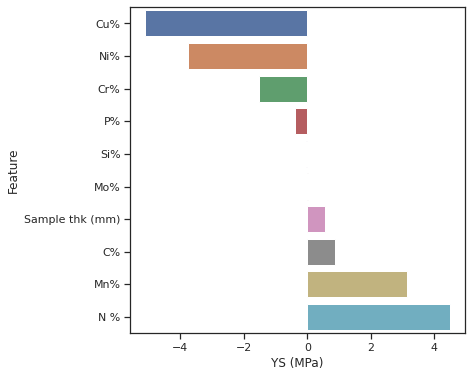

In [220]:
MIV_sorted1= MIV.sort_values('YS (MPa)')
fig,ax=plt.subplots(figsize=(6,6))
ax = sns.barplot(x="YS (MPa)",y="Feature", data=MIV_sorted1)

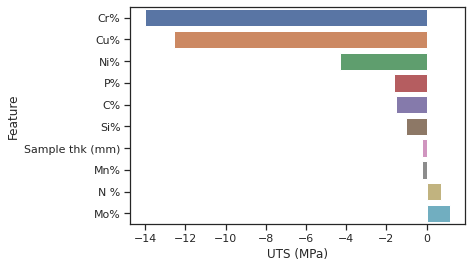

In [221]:
MIV_sorted2= MIV.sort_values('UTS (MPa)')
fig,ax=plt.subplots()
ax = sns.barplot(x="UTS (MPa)",y="Feature", data=MIV_sorted2)

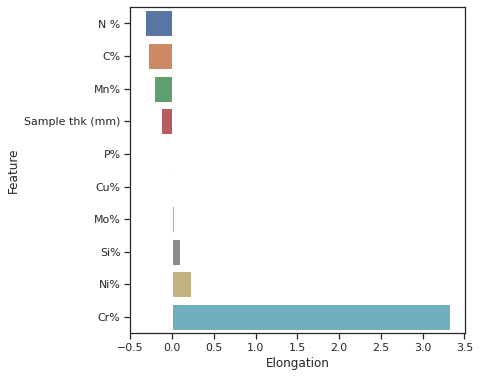

In [222]:
MIV_sorted1= MIV.sort_values('Elongation')
fig,ax=plt.subplots(figsize=(6,6))
ax = sns.barplot(x="Elongation",y="Feature", data=MIV_sorted1)

# MIV Uisng RandomForest

In [223]:
feature=['Cr%', 'Sample thk (mm)', 'C%', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo%',
        'N %']
MIV_rf['Feature']=feature

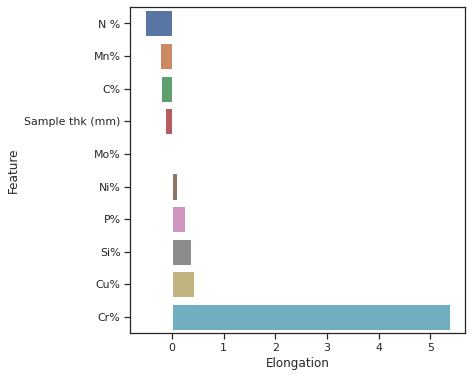

In [224]:
MIV_sorted1= MIV_rf.sort_values('Elongation')
fig,ax=plt.subplots(figsize=(6,6))
ax = sns.barplot(x="Elongation",y="Feature", data=MIV_sorted1)

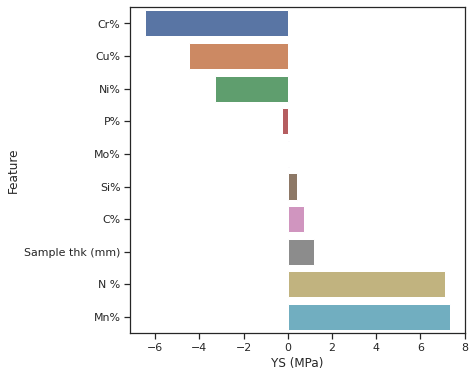

In [225]:
MIV_sorted1= MIV_rf.sort_values('YS (MPa)')
fig,ax=plt.subplots(figsize=(6,6))
ax = sns.barplot(x="YS (MPa)",y="Feature", data=MIV_sorted1)

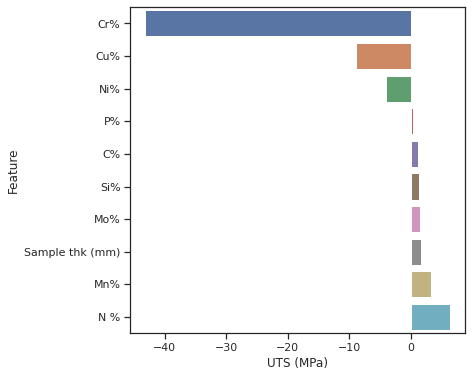

In [226]:
MIV_sorted1= MIV_rf.sort_values('UTS (MPa)')
fig,ax=plt.subplots(figsize=(6,6))
ax = sns.barplot(x="UTS (MPa)",y="Feature", data=MIV_sorted1)

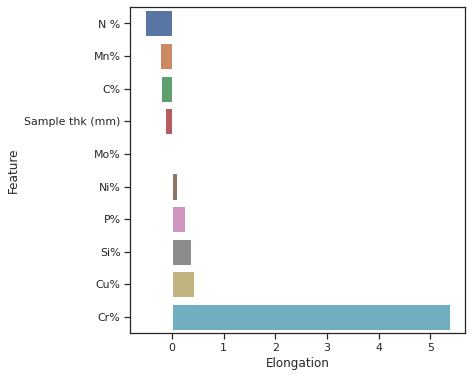

In [227]:
MIV_sorted1= MIV_rf.sort_values('Elongation')
fig,ax=plt.subplots(figsize=(6,6))
ax = sns.barplot(x="Elongation",y="Feature", data=MIV_sorted1)

In [228]:
X_train=X_train.drop(['Cr_plus', 'Cr_minus', 'sam_plus', 'sam_minus',
       'C_plus', 'C-minus', 'Mn_plus', 'Mn_minus', 'P_plus', 'P_minus',
       'Si_plus', 'Si_minus', 'Ni_plus', 'Ni_minus', 'Cu_plus', 'Cu_minus',
       'Mo_plus', 'Mo_minus',  'N_plus',
       'N_minus'],axis=1)

In [229]:
X_train

Cr%  Sample thk (mm)     C%    Mn%     P%   Si%   Ni%   Cu%   Mo%  \
770   15.340000             0.61  0.101   9.96  0.090  0.44  0.80  2.01  0.16   
1303  15.080000             0.51  0.104   9.98  0.074  0.42  0.81  1.75  0.06   
2267  15.600000             0.81  0.100   9.94  0.075  0.42  0.68  1.95  0.05   
1948  16.400000             0.89  0.099   8.42  0.056  0.35  1.67  2.01  0.09   
1541  16.120001             1.47  0.088   8.18  0.051  0.34  1.70  2.10  0.10   
...         ...              ...    ...    ...    ...   ...   ...   ...   ...   
1148  16.299999             0.76  0.086   8.10  0.055  0.32  1.55  2.05  0.13   
1092  16.320000             1.26  0.091   8.20  0.053  0.31  1.70  2.12  0.14   
1284  15.100000             0.51  0.110   9.90  0.072  0.48  0.81  1.75  0.05   
362   14.350000             1.00  0.113  10.07  0.062  0.44  0.49  0.65  0.05   
1249  16.110001             0.77  0.087   8.15  0.057  0.27  1.51  2.04  0.10   

         N %  
770   0.1509  
1303  0.1590  
2267  0.1550  
1948  0.1979  
1541  0.1775  
...      ...  
1148  0.1742  
1092  0.1710  
1284  0.1575  
362   0.1650  
1249  0.1707  

[2367 rows x 10 columns]

# Shap Method using Extra Tree

In [230]:
import shap
shap_value1 = shap.TreeExplainer(model1).shap_values(X_train)

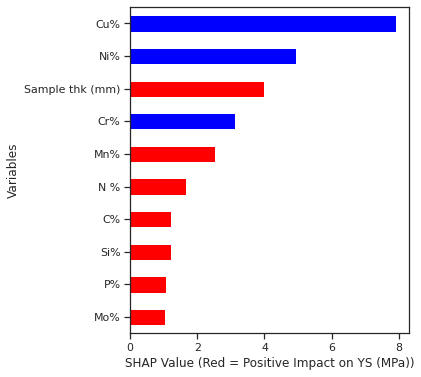

In [231]:

def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variables','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variables','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variables',right_on='Variables',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variables',y='SHAP_abs',color = colorlist,figsize=(5,6), legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact on YS (MPa))")
    
ABS_SHAP(shap_value1[0],X_train) 

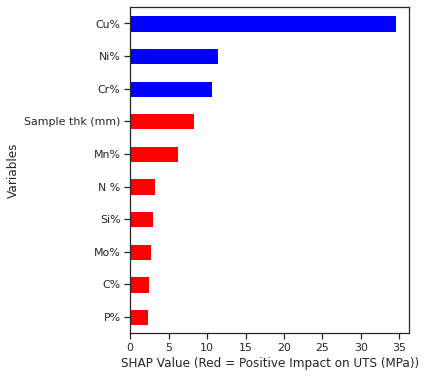

In [232]:

def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variables','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variables','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variables',right_on='Variables',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variables',y='SHAP_abs',color = colorlist,figsize=(5,6), legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact on UTS (MPa))")
    
ABS_SHAP(shap_value1[1],X_train) 

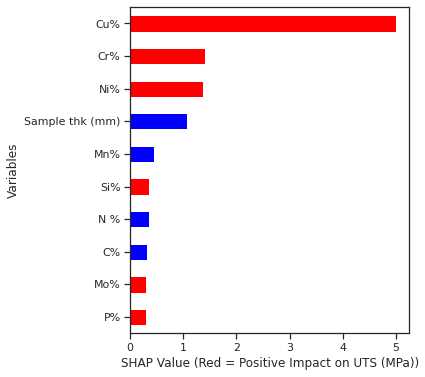

In [233]:
ABS_SHAP(shap_value1[2],X_train) 

# Shap method on test Data using ETR


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=193; total time=   1.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=193; total time=   2.4s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=40; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=193; total time=   2.8s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=193; total time=   2.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=40; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=40; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_

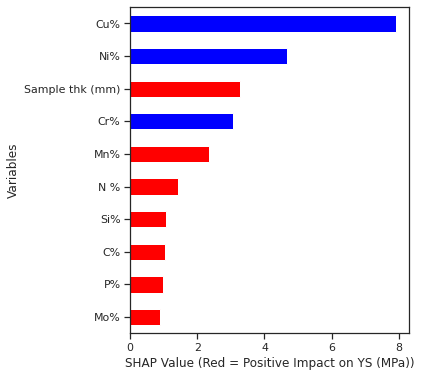

In [234]:
import shap
shap_value2 = shap.TreeExplainer(model1).shap_values(X_test)
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variables','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variables','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variables',right_on='Variables',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variables',y='SHAP_abs',color = colorlist,figsize=(5,6), legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact on YS (MPa))")
    
ABS_SHAP(shap_value2[0],X_test) 

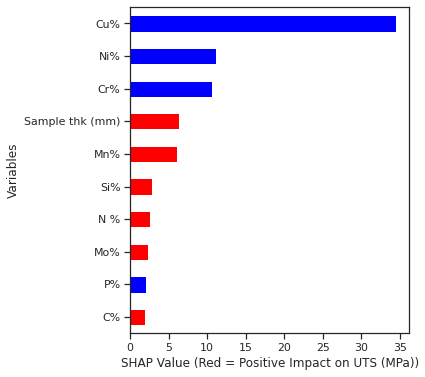

In [235]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variables','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variables','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variables',right_on='Variables',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variables',y='SHAP_abs',color = colorlist,figsize=(5,6), legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact on UTS (MPa))")
    
ABS_SHAP(shap_value2[1],X_test) 

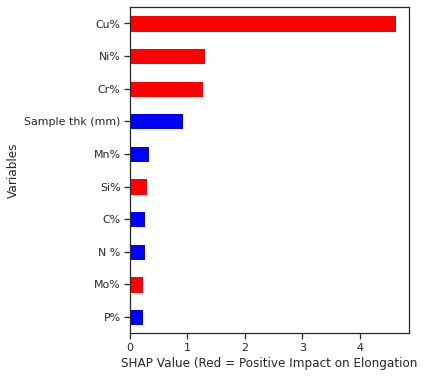

In [236]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variables','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variables','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variables',right_on='Variables',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variables',y='SHAP_abs',color = colorlist,figsize=(5,6), legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact on Elongation")
    
ABS_SHAP(shap_value2[2],X_test) 

### plotting the correlation of input variables with output

In [237]:
# log=[]
# for i in range(0,40,1):
#     for j in np.arange(0.05,0.35,0.05):
#         X=df[['Cr%','Sample thk (mm)', 'C%', 'Mn%', 'P%',
#        'Si%', 'Ni%', 'Cu%','Mo%',  'Grain Size','N %']]
#         y=df[['YS (MPa)','UTS (MPa)','El% on 50mm GL']]
        
#         X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size = j, shuffle = True, random_state = i)
#         reg = RandomForestRegressor()
#         reg.fit(X_train_rf,y_train_rf)
#         pred_TI = reg.predict(X_test_rf)
#         rr = r2_score(y_test_rf, pred_TI)
#         #print(rr, i,j)
#         log.append([rr,i,j])

In [238]:
# log=pd.DataFrame(log,columns=['r2_score','random_state','test_size'])
# log['r2_score'].idxmax()

In [239]:
# log[135:140]

In [240]:
X_rf=df[['Cr%','Sample thk (mm)', 'C%', 'Mn%', 'P%',
       'Si%', 'Ni%', 'Cu%','Mo%',  'Grain Size','N %']]
y_rf=df[['YS (MPa)','UTS (MPa)','El% on 50mm GL']]
        
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size = 0.05, shuffle = True, random_state = 17)


In [241]:
err=abs(y_test-y_et)

In [242]:
y_et=model1.predict(X_test)
y_pred_rf=rf.predict(X_test)

In [243]:
linregress(y_test.iloc[:,0],y_et[:,0])

LinregressResult(slope=0.7791023574613887, intercept=94.27977692631032, rvalue=0.8192783120027419, pvalue=5.440590798804764e-65, stderr=0.03375184475279382, intercept_stderr=14.478392620482717)

In [244]:
linregress(y_test.iloc[:,1],y_et[:,1])

LinregressResult(slope=0.898436719897208, intercept=88.19262590171661, rvalue=0.9147304426253927, pvalue=1.0357489475573891e-104, stderr=0.02456546178898926, intercept_stderr=21.070511395986706)

In [245]:
mean_squared_error(y_test.iloc[:,1],y_et[:,1],squared=False)

29.29743542088302

In [246]:
linregress(y_test.iloc[:,2],y_et[:,2])

LinregressResult(slope=0.8162402523598782, intercept=10.085800402918352, rvalue=0.877056309238444, pvalue=4.417080233246092e-85, stderr=0.027673370076670756, intercept_stderr=1.535402967297476)

In [247]:
mean_squared_error(y_test.iloc[:,2],y_et[:,2],squared=False)

4.854820685511094

# Violin plot for comparison between ETR and RF

<Figure size 432x288 with 0 Axes>

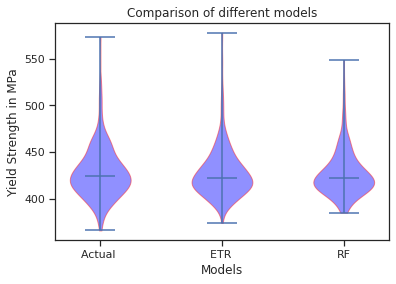

In [248]:
def drawViolinPlot(xlabel, xticks, xticklabels, ylabel, bandwidth, title):

    # Customize x-axis
    fig,ax=plt.subplots()
    ax.set_xlabel(xlabel);

    ax.set_xticks(xticks);

    ax.set_xticklabels(xticklabels);

 

    # Customize y-axis

    ax.set_ylabel(ylabel);

 

    # Draw a violin plot for the distributions - Default bandwidth

    violin_parts=ax.violinplot(sequences,  showmedians=True, bw_method=bandwidth);

    ax.set_title(title);
    rrred = '#ff2222'
    bluuu = '#2222ff'
    for vp in violin_parts['bodies']:
        vp.set_facecolor(bluuu)
        vp.set_edgecolor(rrred)
        vp.set_linewidth(1)
        vp.set_alpha(0.5)

 

 

# Distributions as python lists
data_to_plot=[y_test.iloc[:,0],y_et[:,0],y_pred.iloc[:,3]]



 

# A tuple of distributions

sequences = (y_test.iloc[:,0],y_et[:,0],y_pred.iloc[:,3]);


plt.subplots_adjust(hspace=1);

 

bandwidth = None;

drawViolinPlot(

              "Models",

              np.arange(len(sequences)+1),

              ('', 'Actual ', 'ETR ','RF'),

              "Yield Strength in MPa", bandwidth,

              "Comparison of different models");

 

# Display violin plot

plt.show();                 

<Figure size 432x288 with 0 Axes>

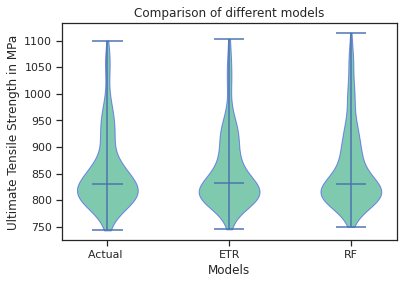

In [249]:
def drawViolinPlot(xlabel, xticks, xticklabels, ylabel, bandwidth, title):

    # Customize x-axis
    fig,ax=plt.subplots()
    ax.set_xlabel(xlabel);

    ax.set_xticks(xticks);

    ax.set_xticklabels(xticklabels);
    # Customize y-axis
    ax.set_ylabel(ylabel);
   # Draw a violin plot for the distributions - Default bandwidth
    violin_parts=ax.violinplot(sequences,  showmedians=True, bw_method=bandwidth);
    ax.set_title(title);
    rrred = '#009761'
    bluuu = '#2222ff'
    khn='#007063'
    for vp in violin_parts['bodies']:
        vp.set_facecolor(rrred)
        vp.set_edgecolor(bluuu)
        vp.set_linewidth(1)
        vp.set_alpha(0.5)
# Distributions as python lists
data_to_plot1=[y_test.iloc[:,1],y_et[:,1],y_pred.iloc[:,4]]
# A tuple of distributions
sequences = (y_test.iloc[:,1],y_et[:,1],y_pred.iloc[:,4]);
plt.subplots_adjust(hspace=1);
bandwidth = None;
drawViolinPlot("Models",
              np.arange(len(sequences)+1),

              ('', 'Actual ', 'ETR','RF'),

              "Ultimate Tensile Strength in MPa", bandwidth,

              "Comparison of different models");
# Display violin plot

plt.show();       

<Figure size 432x288 with 0 Axes>

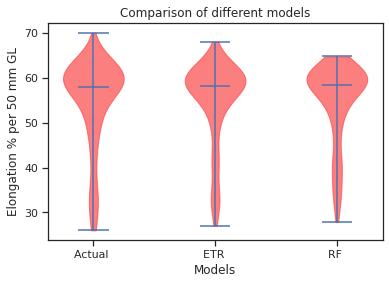

In [250]:
def drawViolinPlot(xlabel, xticks, xticklabels, ylabel, bandwidth, title):
    # Customize x-axis
    fig,ax=plt.subplots()
    ax.set_xlabel(xlabel);
    ax.set_xticks(xticks);
    ax.set_xticklabels(xticklabels);
    # Customize y-axis
    ax.set_ylabel(ylabel);
    # Draw a violin plot for the distributions - Default bandwidth
    violin_parts=ax.violinplot(sequences,  showmedians=True, bw_method=bandwidth);
    ax.set_title(title);
    rrred = '#ff2222'
    bluuu = '#2222ff'
    kjh='#F80000'
    for vp in violin_parts['bodies']:
        vp.set_facecolor(kjh)
        vp.set_edgecolor(rrred)
        vp.set_linewidth(1)
        vp.set_alpha(0.5)
# Distributions as python lists
data_to_plot=[y_test.iloc[:,2],y_et[:,2],y_pred.iloc[:,5]]

# A tuple of distributions
sequences = (y_test.iloc[:,2],y_et[:,2],y_pred.iloc[:,5]);
plt.subplots_adjust(hspace=1);
bandwidth = None;

drawViolinPlot("Models",np.arange(len(sequences)+1),('', 'Actual ', 'ETR ','RF '),"Elongation % per 50 mm GL", bandwidth,
               "Comparison of different models");
# Display violin plot
plt.show()

<h1><center><span style="color:red">Checking the model with Data outside of Database </span> </center></h1> </span><h1><center><span 

In [251]:
test=pd.read_csv('../input/new-data/tensile new.csv',encoding= 'unicode_escape')

In [252]:
test.columns

Index(['NAME', 'Testing\nDate', 'CON', 'Finish', 'End Date', 'Work center',
       'PPC_Remarks1', 'Output \nBatch', 'Output \nMaterial', 'Coil no.',
       'Grade', 'Thick\n(mm)', 'Output Weight  ', 'Heat Number', 'Width ',
       'END', 'Sample Thk.\n(TRANS)', '0.2%\nP.S.\n(TRANS)', 'UTS.\n\n(TRANS)',
       'EL% ON 50mm (GL).\n(TRANS)', 'Hardness\n(TRANS)', 'Pass/Fail',
       'BAND TEST/ RA%', 'Cupping', 'Ra', 'Rz', 'Ra20%', 'Rz20%',
       'Ridging\nIndex', 'Reflectivity\n(20deg)', 'Reflectivity\n(60deg)',
       'Reflectivity\n(85deg)', 'Grain Size', 'Comments on Microstructure',
       'R0', 'R45', 'R90', 'Avg R-bar', 'Grade.1', 'C%', 'Mn%', 'S%', 'P%',
       'Si%', 'Ni%', 'Cr%', 'Cu%', 'Mo%', 'Ti%', 'N2', 'V', 'B', 'AL', 'Pb',
       'Sn', 'Nb', 'Co', 'H2', 'M.F.', 'Quality Plan', 'Quality remark', 'F.F',
       'F.P', 'G.P', 'W ppm', 'Zn'],
      dtype='object')

In [253]:
test.drop(['NAME', 'Testing\nDate', 'CON', 'Finish', 'End Date', 'Work center',
       'PPC_Remarks1', 'Output \nBatch', 'Output \nMaterial', 'Coil no.',
        'Thick\n(mm)', 'Output Weight  ', 'Heat Number', 'Width ',
       'END','Hardness\n(TRANS)', 'Pass/Fail',
       'BAND TEST/ RA%', 'Cupping', 'Ra', 'Rz', 'Ra20%', 'Rz20%',
       'Ridging\nIndex', 'Reflectivity\n(20deg)', 'Reflectivity\n(60deg)',
       'Reflectivity\n(85deg)', 'Grain Size', 'Comments on Microstructure',
       'R0', 'R45', 'R90', 'Avg R-bar', 'Grade.1','V', 'B', 'AL', 'Pb',
       'Sn', 'Nb', 'Co', 'H2', 'M.F.', 'Quality Plan', 'Quality remark', 'F.F',
       'F.P', 'G.P', 'W ppm', 'Zn','S%'],axis=1,inplace=True)

In [254]:
test.head()

Grade  Sample Thk.\n(TRANS)  0.2%\nP.S.\n(TRANS)  UTS.\n\n(TRANS)  \
0  JSLU SD                  1.21                468.0            975.0   
1    204CU                  0.60                393.0            800.0   
2    204CU                  0.60                382.0            774.0   
3  JSLU DD                  0.61                419.0            826.0   
4  JSLU DD                  0.50                401.0            826.0   

   EL% ON 50mm (GL).\n(TRANS)     C%    Mn%     P%   Si%   Ni%    Cr%   Cu%  \
0                        63.0  0.113  10.00  0.067  0.57  0.68  14.89  1.19   
1                        64.0  0.091   8.20  0.054  0.26  1.58  16.03  2.10   
2                        68.0  0.091   8.20  0.054  0.26  1.58  16.03  2.10   
3                        64.0  0.104   9.84  0.065  0.43  0.68  15.39  1.94   
4                        66.0  0.102  10.15  0.091  0.38  0.66  15.38  1.98   

    Mo%  Ti%      N2  
0  0.06  NaN  1550.0  
1  0.12  NaN  1800.0  
2  0.12  NaN  1800.0  
3  0.03  NaN  1690.0  
4  0.05  NaN  1695.0

In [255]:
test.rename({'Sample Thk.\n(TRANS)':'Sample thk(mm)','0.2%\nP.S.\n(TRANS)':'YS (MPa)',
             'UTS.\n\n(TRANS)':'UTS (MPa)',
             'EL% ON 50mm (GL).\n(TRANS)':'El% on 50mm GL'},axis=1,inplace=True)

In [256]:
test.rename({},axis=1,inplace=True)

In [257]:
test

Grade  Sample thk(mm)  YS (MPa)  UTS (MPa)  El% on 50mm GL     C%  \
0     JSLU SD            1.21     468.0      975.0            63.0  0.113   
1       204CU            0.60     393.0      800.0            64.0  0.091   
2       204CU            0.60     382.0      774.0            68.0  0.091   
3     JSLU DD            0.61     419.0      826.0            64.0  0.104   
4     JSLU DD            0.50     401.0      826.0            66.0  0.102   
...       ...             ...       ...        ...             ...    ...   
1308    204CU            0.61     403.0      776.0            64.0  0.085   
1309    204CU            0.10     389.0      778.0            64.0  0.085   
1310    204CU            0.52     404.0      789.0            60.0  0.098   
1311    204CU            2.01     431.0      781.0            54.0  0.087   
1312  JSLU DD            0.61     357.0      836.0            59.0  0.098   

        Mn%     P%   Si%   Ni%    Cr%   Cu%   Mo%    Ti%      N2  
0     10.00  0.067  0.57  0.68  14.89  1.19  0.06    NaN  1550.0  
1      8.20  0.054  0.26  1.58  16.03  2.10  0.12    NaN  1800.0  
2      8.20  0.054  0.26  1.58  16.03  2.10  0.12    NaN  1800.0  
3      9.84  0.065  0.43  0.68  15.39  1.94  0.03    NaN  1690.0  
4     10.15  0.091  0.38  0.66  15.38  1.98  0.05    NaN  1695.0  
...     ...    ...   ...   ...    ...   ...   ...    ...     ...  
1308   8.15  0.053  0.58  1.54  16.10  2.07  0.08  0.008  1810.0  
1309   8.15  0.053  0.58  1.54  16.10  2.07  0.08  0.008  1810.0  
1310   8.09  0.056  0.42  1.55  16.28  2.10  0.11  0.008  1970.0  
1311   8.10  0.058  0.26  1.54  16.10  2.08  0.15  0.005  1756.0  
1312   9.40  0.077  0.40  1.07  15.62  1.80  0.07  0.006  1415.0  

[1313 rows x 15 columns]

In [258]:
test.drop(['Ti%'],axis=1,inplace=True)

In [259]:
test.head()

Grade  Sample thk(mm)  YS (MPa)  UTS (MPa)  El% on 50mm GL     C%    Mn%  \
0  JSLU SD            1.21     468.0      975.0            63.0  0.113  10.00   
1    204CU            0.60     393.0      800.0            64.0  0.091   8.20   
2    204CU            0.60     382.0      774.0            68.0  0.091   8.20   
3  JSLU DD            0.61     419.0      826.0            64.0  0.104   9.84   
4  JSLU DD            0.50     401.0      826.0            66.0  0.102  10.15   

      P%   Si%   Ni%    Cr%   Cu%   Mo%      N2  
0  0.067  0.57  0.68  14.89  1.19  0.06  1550.0  
1  0.054  0.26  1.58  16.03  2.10  0.12  1800.0  
2  0.054  0.26  1.58  16.03  2.10  0.12  1800.0  
3  0.065  0.43  0.68  15.39  1.94  0.03  1690.0  
4  0.091  0.38  0.66  15.38  1.98  0.05  1695.0

In [260]:
test.isnull().sum()

Grade              0
Sample thk(mm)    10
YS (MPa)          10
UTS (MPa)         11
El% on 50mm GL    11
C%                 1
Mn%                1
P%                 1
Si%                1
Ni%                1
Cr%                1
Cu%                1
Mo%                1
N2                 1
dtype: int64

In [261]:
test.dropna(axis=0,inplace=True)

In [262]:
test['Sample thk(mm)'] = pd.to_numeric(test['Sample thk(mm)'], downcast="float")
test['C%'] = pd.to_numeric(test['C%'], downcast="float")
test['Mn%'] = pd.to_numeric(test['Mn%'], downcast="float")
#test['S%'] = pd.to_numeric(test['S%'], downcast="float")
test['P%'] = pd.to_numeric(test['P%'], downcast="float")
test['Si%'] = pd.to_numeric(test['Si%'], downcast="float")
test['Ni%'] = pd.to_numeric(test['Ni%'], downcast="float")
test['Cr%'] = pd.to_numeric(test['Cr%'], downcast="float")
test['Cu%'] = pd.to_numeric(test['Cu%'], downcast="float")
test['Mo%'] = pd.to_numeric(test['Mo%'], downcast="float")
test['N2'] = pd.to_numeric(test['N2'], downcast="float")
#df['B%'] = pd.to_numeric(df['B%'], downcast="float")
#df['Al%'] = pd.to_numeric(df['Al%'], downcast="float")
# df['Pb (ppm)'] = pd.to_numeric(df['Pb (ppm)'], downcast="float")
# df['Sn (pppm)'] = pd.to_numeric(df['Sn (pppm)'], downcast="float")
#df['Nb%'] = pd.to_numeric(df['Nb%'], downcast="float")
#df['Co%'] = pd.to_numeric(df['Co%'], downcast="float")
#df['H(ppm)'] = pd.to_numeric(df['H(ppm)'], downcast="float")
# df['Cu+Ni'] = pd.to_numeric(df['Cu+Ni'], downcast="float")

test['YS (MPa)'] = pd.to_numeric(test['YS (MPa)'], downcast="float")
test['UTS (MPa)'] = pd.to_numeric(test['UTS (MPa)'], downcast="float")

test['El% on 50mm GL'] = pd.to_numeric(test['El% on 50mm GL'], downcast="float")

In [263]:
conditions = [
    (test['Grade'] == 'JT'),
    (test['Grade'] == 'JSLU DD'),
    (test['Grade']== 'JSLU SD'),(test['Grade']== '204CU')
    ]

# create a list of the values we want to assign for each condition
values = [33,20,20,25]

# create a new column and use np.select to assign values to it using our lists as arguments
test['Grain Size'] = np.select(conditions, values)


In [264]:
test['N %']=0.0001*test['N2']

In [265]:
test['Grain Size'] = pd.to_numeric(test['Grain Size'], downcast="float")

In [266]:
Xval=test[['Cr%', 'Sample thk(mm)', 'C%', 'Mn%', 'P%', 'Si%', 'Ni%', 'Cu%', 'Mo%',
        'N %']]

In [267]:
y=test[['YS (MPa)', 'UTS (MPa)', 'El% on 50mm GL']]

In [268]:
xv_train,xv_test,yv_train,yv_test=train_test_split(Xval,y,test_size=0.05,shuffle=True,random_state=46)

In [269]:
rf.score(xv_test,yv_test)

0.6286876019240385

In [270]:
model1.score(xv_test,yv_test)

0.6410088118362632

In [271]:
yval=model1.predict(xv_test)

In [272]:
yval1=rf.predict(xv_test)

In [273]:
rf.score(xv_test,yv_test)

0.6286876019240385

In [274]:
linregress(yv_test.iloc[:,1],yval[:,1])

LinregressResult(slope=0.930733386732069, intercept=65.18455800729112, rvalue=0.8838662779464495, pvalue=1.8305136354704868e-22, stderr=0.06205441164479721, intercept_stderr=51.07942625162301)

In [275]:
r2_score(yv_test.iloc[:,1],yval[:,1])

0.7126030106149994

In [276]:
r2_score(yv_test.iloc[:,2],yval1[:,2])

0.6590356067797789

In [277]:
r2_score(yv_test.iloc[:,2],yval1[:,2])

0.6590356067797789

Text(0.5, 1.0, 'Training Data')

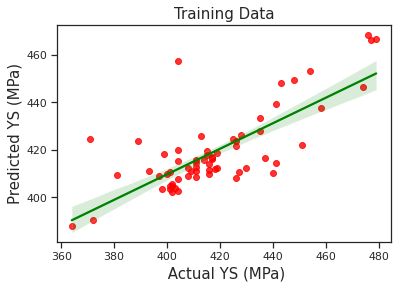

In [278]:
fig, ax = plt.subplots()

YS=sns.regplot(yv_test.iloc[:,0],yval1[:,0],scatter_kws={"color": "red"}, line_kws={"color": "Green"},ci=80)
YS.set_xlabel(" Actual YS (MPa)", fontsize = 15)
YS.set_ylabel("Predicted YS (MPa)", fontsize = 15)


plt.title('Training Data',fontsize=15)
#plt.grid()

Text(0.5, 1.0, 'Training Data')

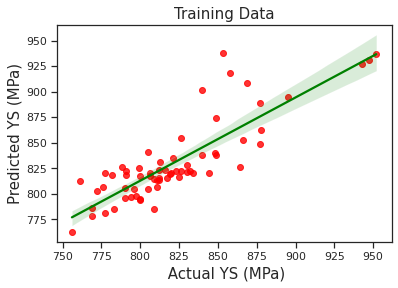

In [279]:
fig, ax = plt.subplots()

YS=sns.regplot(yv_test.iloc[:,1],yval1[:,1],scatter_kws={"color": "red"}, line_kws={"color": "Green"},)
YS.set_xlabel(" Actual YS (MPa)", fontsize = 15)
YS.set_ylabel("Predicted YS (MPa)", fontsize = 15)


plt.title('Training Data',fontsize=15)
#plt.grid()

Text(0.5, 1.0, 'Training Data')

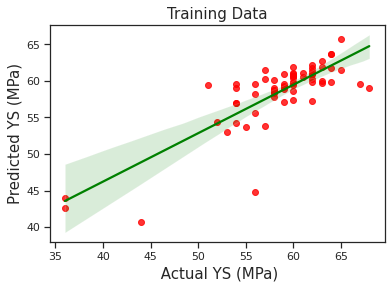

In [280]:
YS=sns.regplot(yv_test.iloc[:,2],yval1[:,2],scatter_kws={"color": "red"}, line_kws={"color": "Green"},)
YS.set_xlabel(" Actual YS (MPa)", fontsize = 15)
YS.set_ylabel("Predicted YS (MPa)", fontsize = 15)


plt.title('Training Data',fontsize=15)

In [281]:
r2_score(yv_test.iloc[:,0],yval1[:,0])

0.57328237775038

In [282]:
r2_score(yv_test.iloc[:,1],yval1[:,1])

0.6537448212419565

In [283]:
r2_score(yv_test.iloc[:,2],yval1[:,2])

0.6590356067797789

In [284]:
from sklearn.metrics import r2_score
log2=[]
for i in range(0,40,1):
    

    xv_train,xv_test,yv_train,yv_test=train_test_split(Xval,y,test_size=0.1,shuffle=True,random_state=i)
    
    pred_TI = rf.predict(xv_test)
    rr = r2_score(yv_test, pred_TI)
    print(rr, i)
    log2.append(rr)

0.41066004616232554 0
0.5092042681654156 1
0.4264020091454174 2
0.5397143516311167 3
0.4722954390847054 4
0.36323994270934357 5
0.4174533901804079 6
0.5035936901163103 7
0.5579519283776561 8
0.4968060816755844 9
0.24880952999273995 10
0.2618517789019282 11
0.24100629016985606 12
0.5376940339524587 13
0.4331778499292011 14
0.5778171328111797 15
0.46237577524196344 16
0.507386717878625 17
0.359183426307363 18
0.14147494401060767 19
0.23437096006365657 20
0.366405738366444 21
0.4204132154688185 22
0.43393905572911756 23
0.18076922246341684 24
0.3230083359447277 25
0.452809317795637 26
0.21359933514685223 27
0.3651005220373677 28
0.35026996936588023 29
0.4538505939987121 30
0.48097449678645826 31
0.40703402230569835 32
0.3851968599773829 33
0.4721692030852473 34
0.4016768423862138 35
0.4947289910577979 36
0.4566385719020814 37
0.2264464420791891 38
0.41311650064207406 39


In [285]:
from sklearn.metrics import r2_score
log2=[]
for i in range(0,40,1):
    for j in np.arange(0.05,0.2,0.05):
        xv_train,xv_test,yv_train,yv_test=train_test_split(Xval,y,test_size=j,shuffle=True,random_state=i)
        pred_TI = model1.predict(xv_test)
        rr = r2_score(yv_test, pred_TI)
       
        log2.append(rr)    
    

In [286]:
max(log2)

0.7001275354366837

In [287]:
model1.predict(X_test)

array([[ 423.55333333,  837.1       ,   59.30166667],
       [ 403.        ,  835.        ,   61.        ],
       [ 429.        ,  975.        ,   57.        ],
       [ 429.        ,  838.        ,   30.        ],
       [ 398.        ,  763.        ,   62.        ],
       [ 435.65      ,  893.38      ,   50.04      ],
       [ 422.765     ,  819.45666667,   60.22166667],
       [ 469.53      ,  938.78      ,   43.71      ],
       [ 414.38      ,  823.09      ,   60.96      ],
       [ 413.37      ,  798.935     ,   56.095     ],
       [ 410.        ,  823.33333333,   57.33333333],
       [ 426.865     ,  828.065     ,   59.26      ],
       [ 420.        ,  799.        ,   62.        ],
       [ 394.97      ,  784.96      ,   59.42      ],
       [ 391.63      ,  788.5       ,   63.72      ],
       [ 415.        ,  810.        ,   63.        ],
       [ 408.915     ,  809.165     ,   60.07      ],
       [ 381.565     ,  770.14      ,   60.6       ],
       [ 447.035     ,  894.